<a href="https://colab.research.google.com/github/NigelGoh16/Bitcoin_Prediction_Model/blob/main/Bitcoin_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [2]:
# Importing liberaries
# https://towardsdatascience.com/how-to-combine-the-forecasts-of-an-ensemble-11022e5cac25
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tabulate import tabulate
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',FutureWarning)
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp -r '/content/gdrive/MyDrive/ML' kaggle.json

! cp -r /content/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/gdrive


In [4]:
! kaggle datasets download -d sushilkumarinfo/bitcoin-transactional-data

 47% 5.00M/10.7M [00:00<00:00, 37.9MB/s]
100% 10.7M/10.7M [00:00<00:00, 55.4MB/s]


In [5]:
import zipfile

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/bitcoin-transactional-data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [6]:
import pandas as pd

df = pd.read_csv('/content/BTC_DATA.csv')
df['Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.set_index("Date", inplace = True)

# Data Visualizing

In [7]:
df.head()

Unnamed: 0  priceUSD  transactions     size  sentbyaddress  \
Date                                                                     
2010-07-18           0    0.0726           248  765.285            424   
2010-07-19           1    0.0859           354  756.040            553   
2010-07-20           2    0.0783           413  984.707            632   
2010-07-21           3    0.0767           256  542.483            440   
2010-07-22           4    0.0649           221  491.903            412   

            difficulty      hashrate  mining_profitability  sentinusdUSD  \
Date                                                                       
2010-07-18     181.543  1.554461e+09              401834.0        2612.0   
2010-07-19     181.543  1.551287e+09              481473.0        4047.0   
2010-07-20     181.543  1.640430e+09              431831.0        2341.0   
2010-07-21     181.543  1.723493e+09              460783.0        2122.0   
2010-07-22     181.543  1.705481e+09              334641.0        2570.0   

            transactionfeesUSD  ...  price3rsiUSD  price7rsiUSD  \
Date                            ...                               
2010-07-18            0.000243  ...         0.000           0.0   
2010-07-19            0.000022  ...         0.000           0.0   
2010-07-20            0.000000  ...        82.751           0.0   
2010-07-21            0.000000  ...        78.603           0.0   
2010-07-22            0.000000  ...        49.814           0.0   

            price14rsiUSD  price30rsiUSD  price90rsiUSD  price3rocUSD  \
Date                                                                    
2010-07-18            0.0            0.0            0.0         0.000   
2010-07-19            0.0            0.0            0.0         0.000   
2010-07-20            0.0            0.0            0.0        58.099   
2010-07-21            0.0            0.0            0.0         5.652   
2010-07-22            0.0            0.0            0.0       -24.455   

            price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
Date                                                                   
2010-07-18           0.0            0.0            0.0            0.0  
2010-07-19           0.0            0.0            0.0            0.0  
2010-07-20           0.0            0.0            0.0            0.0  
2010-07-21           0.0            0.0            0.0            0.0  
2010-07-22           0.0            0.0            0.0            0.0  

[5 rows x 737 columns]

In [8]:
df.tail()

Unnamed: 0  priceUSD  transactions      size  sentbyaddress  \
Date                                                                      
2022-07-19        4384   22514.0        279812  746068.0         502989   
2022-07-20        4385   23568.0        260069  717017.0         457913   
2022-07-21        4386   22936.0        273837  719470.0         465780   
2022-07-22        4387   23145.0        263144  661528.0         414074   
2022-07-23        4388   22512.0        223590  516219.0         275842   

              difficulty      hashrate  mining_profitability  sentinusdUSD  \
Date                                                                         
2022-07-19  2.915280e+13  1.891411e+20                0.1060  5.415818e+10   
2022-07-20  2.915280e+13  1.924968e+20                0.0996  4.309965e+10   
2022-07-21  2.882714e+13  1.910321e+20                0.1070  5.569455e+10   
2022-07-22  2.769257e+13  1.889912e+20                0.1040  5.839661e+10   
2022-07-23  2.769257e+13  1.848600e+20                0.1190  4.852391e+10   

            transactionfeesUSD  ...  price3rsiUSD  price7rsiUSD  \
Date                            ...                               
2022-07-19               2.147  ...        93.897        75.464   
2022-07-20               2.324  ...        96.938        81.982   
2022-07-21               2.026  ...        66.958        69.145   
2022-07-22               1.913  ...        71.358        70.905   
2022-07-23               1.354  ...        44.459        59.010   

            price14rsiUSD  price30rsiUSD  price90rsiUSD  price3rocUSD  \
Date                                                                    
2022-07-19         58.546         44.905         42.126         7.894   
2022-07-20         64.268         48.147         43.052        11.050   
2022-07-21         59.013         46.453         42.639         5.182   
2022-07-22         60.175         47.091         42.823         2.806   
2022-07-23         55.084         45.397         42.406        -4.479   

            price7rocUSD  price14rocUSD  price30rocUSD  price90rocUSD  
Date                                                                   
2022-07-19        13.943         12.592         16.868        -45.701  
2022-07-20        20.222         16.851         16.143        -43.491  
2022-07-21        13.698         10.446          9.218        -42.873  
2022-07-22        11.375          6.403         13.958        -41.676  
2022-07-23         7.886          4.149          9.753        -43.216  

[5 rows x 737 columns]

In [9]:
# Checking all columns in the data
for c in df.columns:
  print(c)

Unnamed: 0
priceUSD
transactions
size
sentbyaddress
difficulty
hashrate
mining_profitability
sentinusdUSD
transactionfeesUSD
median_transaction_feeUSD
confirmationtime
transactionvalueUSD
mediantransactionvalueUSD
activeaddresses
top100cap
fee_to_rewardUSD
transactions3sma
transactions7sma
transactions14sma
transactions30sma
transactions90sma
transactions3ema
transactions7ema
transactions14ema
transactions30ema
transactions90ema
transactions3wma
transactions7wma
transactions14wma
transactions30wma
transactions90wma
transactions3trx
transactions7trx
transactions14trx
transactions30trx
transactions90trx
transactions3mom
transactions7mom
transactions14mom
transactions30mom
transactions90mom
transactions3std
transactions7std
transactions14std
transactions30std
transactions90std
transactions3var
transactions7var
transactions14var
transactions30var
transactions90var
transactions3rsi
transactions7rsi
transactions14rsi
transactions30rsi
transactions90rsi
transactions3roc
transactions7roc
trans

In [10]:
# checking data set contains null values
df.isnull().values.any()

False

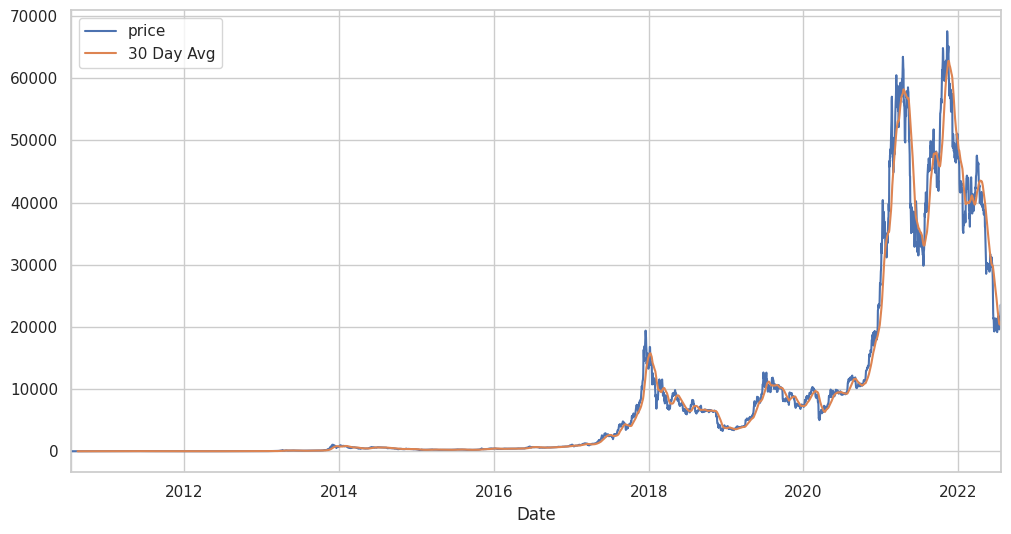

In [11]:
# Visulising the price of BTC 30 day average basis
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style('whitegrid')
df['priceUSD'].plot(figsize=(12,6),label='price')
df['priceUSD'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the
plt.legend()
plt.show()

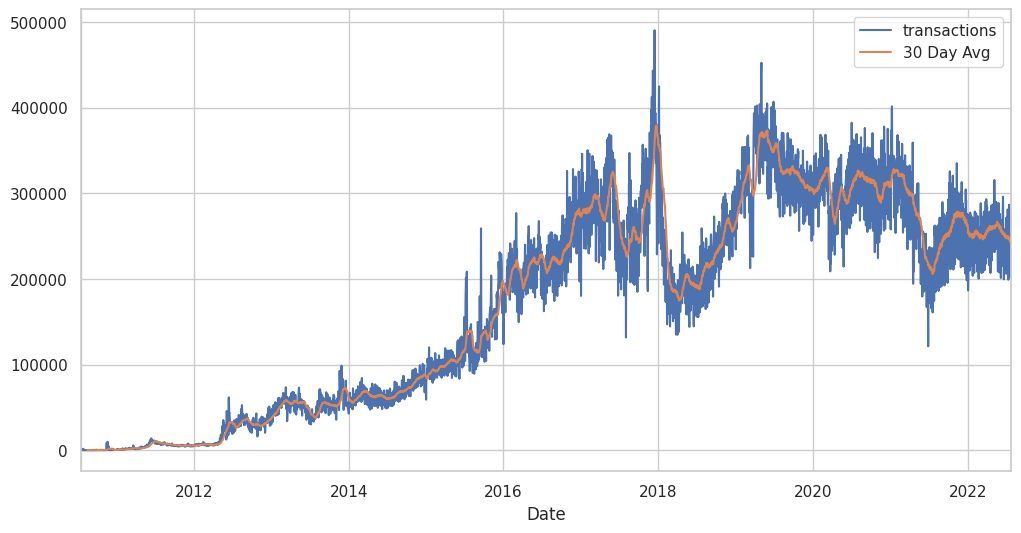

In [12]:
# ploting the no of tractions on 30 average basis
sns.set()
sns.set_style('whitegrid')
df['transactions'].plot(figsize=(12,6),label='transactions')
df['transactions'].rolling(window=30).mean().plot(label='30 Day Avg')# Plotting the
plt.legend()
plt.show()

In [13]:
# Calculating the max, min and mean values from each column
from tabulate import tabulate
info = [[col, df[col].count(), df[col].max(), df[col].min(),df[col].mean()] for col in df.columns]
print(tabulate(info, headers = ['Feature', 'Count', 'Max', 'Min','Mean'], tablefmt = 'orgtbl'))

| Feature                        |   Count |              Max |               Min |             Mean |
|--------------------------------+---------+------------------+-------------------+------------------|
| Unnamed: 0                     |    4389 |   4388           |       0           |   2194           |
| priceUSD                       |    4389 |  67547           |       0.053       |   8197.99        |
| transactions                   |    4389 | 490459           |      92           | 170977           |
| size                           |    4389 | 998092           |     322.952       | 510365           |
| sentbyaddress                  |    4389 | 730199           |     226           | 260076           |
| difficulty                     |    4389 |      3.12511e+13 |     181.543       |      5.64131e+12 |
| hashrate                       |    4389 |      2.53047e+20 |       1.55129e+09 |      4.09371e+19 |
| mining_profitability           |    4389 | 481473           |       0.0

# Features Manipulation

## Removing Redundant Features


In [14]:
# Separating the Price for removal of highly correlated features
df1 = df.reset_index(drop = True)
X = df1.drop('priceUSD',axis = 1)
X

Unnamed: 0  transactions        size  sentbyaddress    difficulty  \
0              0           248     765.285            424  1.815430e+02   
1              1           354     756.040            553  1.815430e+02   
2              2           413     984.707            632  1.815430e+02   
3              3           256     542.483            440  1.815430e+02   
4              4           221     491.903            412  1.815430e+02   
...          ...           ...         ...            ...           ...   
4384        4384        279812  746068.000         502989  2.915280e+13   
4385        4385        260069  717017.000         457913  2.915280e+13   
4386        4386        273837  719470.000         465780  2.882714e+13   
4387        4387        263144  661528.000         414074  2.769257e+13   
4388        4388        223590  516219.000         275842  2.769257e+13   

          hashrate  mining_profitability  sentinusdUSD  transactionfeesUSD  \
0     1.554461e+09           401834.0000  2.612000e+03            0.000243   
1     1.551287e+09           481473.0000  4.047000e+03            0.000022   
2     1.640430e+09           431831.0000  2.341000e+03            0.000000   
3     1.723493e+09           460783.0000  2.122000e+03            0.000000   
4     1.705481e+09           334641.0000  2.570000e+03            0.000000   
...            ...                   ...           ...                 ...   
4384  1.891411e+20                0.1060  5.415818e+10            2.147000   
4385  1.924968e+20                0.0996  4.309965e+10            2.324000   
4386  1.910321e+20                0.1070  5.569455e+10            2.026000   
4387  1.889912e+20                0.1040  5.839661e+10            1.913000   
4388  1.848600e+20                0.1190  4.852391e+10            1.354000   

      median_transaction_feeUSD  ...  price3rsiUSD  price7rsiUSD  \
0                         0.000  ...         0.000         0.000   
1                         0.000  ...         0.000         0.000   
2                         0.000  ...        82.751         0.000   
3                         0.000  ...        78.603         0.000   
4                         0.000  ...        49.814         0.000   
...                         ...  ...           ...           ...   
4384                      0.839  ...        93.897        75.464   
4385                      1.027  ...        96.938        81.982   
4386                      0.936  ...        66.958        69.145   
4387                      0.848  ...        71.358        70.905   
4388                      0.579  ...        44.459        59.010   

      price14rsiUSD  price30rsiUSD  price90rsiUSD  price3rocUSD  price7rocUSD  \
0             0.000          0.000          0.000         0.000         0.000   
1             0.000          0.000          0.000         0.000         0.000   
2             0.000          0.000          0.000        58.099         0.000   
3             0.000          0.000          0.000         5.652         0.000   
4             0.000          0.000          0.000       -24.455         0.000   
...             ...            ...            ...           ...           ...   
4384         58.546         44.905         42.126         7.894        13.943   
4385         64.268         48.147         43.052        11.050        20.222   
4386         59.013         46.453         42.639         5.182        13.698   
4387         60.175         47.091         42.823         2.806        11.375   
4388         55.084         45.397         42.406        -4.479         7.886   

      price14rocUSD  price30rocUSD  price90rocUSD  
0             0.000          0.000          0.000  
1             0.000          0.000          0.000  
2             0.000          0.000          0.000  
3             0.000          0.000          0.000  
4             0.000          0.000          0.000  
...             ...            ...            ...  
4384         1

In [15]:
# Creating a separate dataframe for the Price column
y = df1[["priceUSD"]]
y

priceUSD
0         0.0726
1         0.0859
2         0.0783
3         0.0767
4         0.0649
...          ...
4384  22514.0000
4385  23568.0000
4386  22936.0000
4387  23145.0000
4388  22512.0000

[4389 rows x 1 columns]

In [16]:
import numpy as np
# Create correlation matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

In [17]:
# Drop features which are highly correlated
X.drop(X[to_drop], axis = 1,inplace=True)

In [18]:
X_columns = list(X.columns)
y_columns = ["priceUSD"]

In [19]:
correlation_result = {}
for i in range(len(X_columns)):
    correlation = X[X_columns[i]].corr(y["priceUSD"])
    correlation_result[X_columns[i]] = correlation
correlation_result = sorted(correlation_result.items(), key = lambda kv:(kv[1], kv[0]),reverse = True)

In [20]:
temp = []
for i in correlation_result:
    temp.append(i[0])
X_train2 = X[temp]
X_train2

Unnamed: 0  sentinusdUSD  transactionfeesUSD  difficulty14std  \
0              0  2.612000e+03            0.000243     1.079720e+02   
1              1  4.047000e+03            0.000022     1.247640e+02   
2              2  2.341000e+03            0.000000     1.360760e+02   
3              3  2.122000e+03            0.000000     1.430260e+02   
4              4  2.570000e+03            0.000000     1.462080e+02   
...          ...           ...                 ...              ...   
4384        4384  5.415818e+10            2.147000     2.148773e+11   
4385        4385  4.309965e+10            2.324000     1.369287e+09   
4386        4386  5.569455e+10            2.026000     1.677421e+11   
4387        4387  5.839661e+10            1.913000     7.579135e+11   
4388        4388  4.852391e+10            1.354000     1.016709e+12   

      activeaddresses7std  mining_profitability90trx  activeaddresses3std  \
0                3836.000                      0.000              806.213   
1                3872.000                      0.000              139.870   
2                3973.000                      0.000               57.743   
3                 910.003                      0.000              133.889   
4                 652.409                      0.000              256.262   
...                   ...                        ...                  ...   
4384           194475.000                     -0.432           216592.000   
4385           186298.000                     -0.434           114188.000   
4386           178152.000                     -0.436            94111.000   
4387           169728.000                     -0.438            94359.000   
4388           166542.000                     -0.440           130208.000   

      transactions3std  difficulty90mom  difficulty7std  ...  \
0              409.788     1.737230e+02    1.275940e+02  ...   
1              106.596     1.737230e+02    1.338740e+02  ...   
2              136.532     1.735570e+02    1.295820e+02  ...   
3              129.502     1.700790e+02    1.157030e+02  ...   
4              166.984     1.700790e+02    8.340300e+01  ...   
...                ...              ...             ...  ...   
4384         63833.000     9.268707e+11    3.852714e+06  ...   
4385         26401.000     9.268707e+11    3.852714e+06  ...   
4386         16533.000     6.012077e+11    2.279166e+11  ...   
4387         11801.000    -5.333602e+11    1.009299e+12  ...   
4388         43224.000    -5.333602e+11    1.279570e+12  ...   

      transactionfees90trxUSD  sentbyaddress14trx  hashrate3trx  \
0                       0.000              13.249        14.367   
1                       0.000              11.086         4.890   
2                       0.000               9.201         1.182   
3                       0.000               7.508         0.390   
4                       0.000               6.020         0.151   
...                       ...                 ...           ...   
4384                   -0.263              -0.066        -0.437   
4385                   -0.261              -0.088        -0.418   
4386                   -0.258              -0.109        -0.384   
4387                   -0.256              -0.154        -0.450   
4388                   -0.254              -0.278        -0.709   

      transactions30trx   size90mom  difficulty3trx  \
0                 9.590     461.406          46.606   
1                 9.526     480.796          30.397   
2                 9.253     758.534          19.000   
3                 8.818     343.257          11.819   
4                 8.290     265.170           7.335   
...                 ...         ...             ...   
4384             -0.084  125038.000          -0.004   
4385             -0.081  118507.000          -0.002   
4386             -0.074   37932.000          -0.141   
4387             -0.067  133542.000          -0.698   
4388             -0.063   50723.000          -0.9

## Selecting Top 20 Features

In [21]:
top_20_features = []
for i in range(20):
    top_20_features.append(correlation_result[i][0])

In [22]:
top_20_features
X_train = X[top_20_features]

In [23]:
#refhttps://stackoverflow.com/questions/39409866/correlation-heatmap
# calculate the correlation matrix
corr = X_train.corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

<ipython-input-23-d3ebb7e68aac>:21: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  .set_precision(2)\


In [24]:
X_train = df[top_20_features]
X_train.head()

Unnamed: 0  sentinusdUSD  transactionfeesUSD  difficulty14std  \
Date                                                                        
2010-07-18           0        2612.0            0.000243          107.972   
2010-07-19           1        4047.0            0.000022          124.764   
2010-07-20           2        2341.0            0.000000          136.076   
2010-07-21           3        2122.0            0.000000          143.026   
2010-07-22           4        2570.0            0.000000          146.208   

            activeaddresses7std  mining_profitability90trx  \
Date                                                         
2010-07-18             3836.000                        0.0   
2010-07-19             3872.000                        0.0   
2010-07-20             3973.000                        0.0   
2010-07-21              910.003                        0.0   
2010-07-22              652.409                        0.0   

            activeaddresses3std  transactions3std  difficulty90mom  \
Date                                                                 
2010-07-18              806.213           409.788          173.723   
2010-07-19              139.870           106.596          173.723   
2010-07-20               57.743           136.532          173.557   
2010-07-21              133.889           129.502          170.079   
2010-07-22              256.262           166.984          170.079   

            difficulty7std  hashrate90mom  price90momUSD  difficulty30mom  \
Date                                                                        
2010-07-18         127.594   1.467781e+09            0.0          164.162   
2010-07-19         133.874   1.466614e+09            0.0          164.162   
2010-07-20         129.582   1.553496e+09            0.0          164.162   
2010-07-21         115.703   1.613749e+09            0.0          164.162   
2010-07-22          83.403   1.621318e+09            0.0          164.162   

            transactionvalue90momUSD  fee_to_reward3stdUSD  \
Date                                                         
2010-07-18                       0.0                 0.000   
2010-07-19                       0.0                 0.014   
2010-07-20                       0.0                 0.015   
2010-07-21                       0.0                 0.001   
2010-07-22                       0.0                 0.000   

            mining_profitability30trx  difficulty3std  size3std  \
Date                                                              
2010-07-18                        0.0         112.356   191.448   
2010-07-19                        0.0           0.000   104.932   
2010-07-20                        0.0           0.000   211.366   
2010-07-21                        0.0           0.000   361.145   
2010-07-22                        0.0           0.000   442.707   

            hashrate30mom  confirmationtime  
Date                                         
2010-07-18   1.426285e+09             8.372  
2010-07-19   1.417005e+09             8.276  
2010-07-20   1.500528e+09             7.956  
2010-07-21   1.571638e+09             6.957  
2010-07-22   1.572259e+09             8.182

## Visualizing

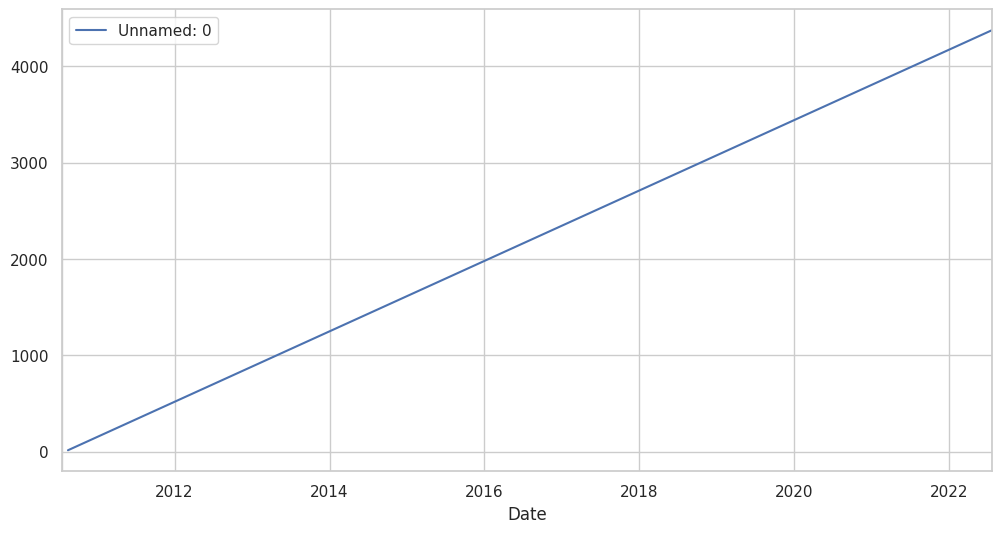

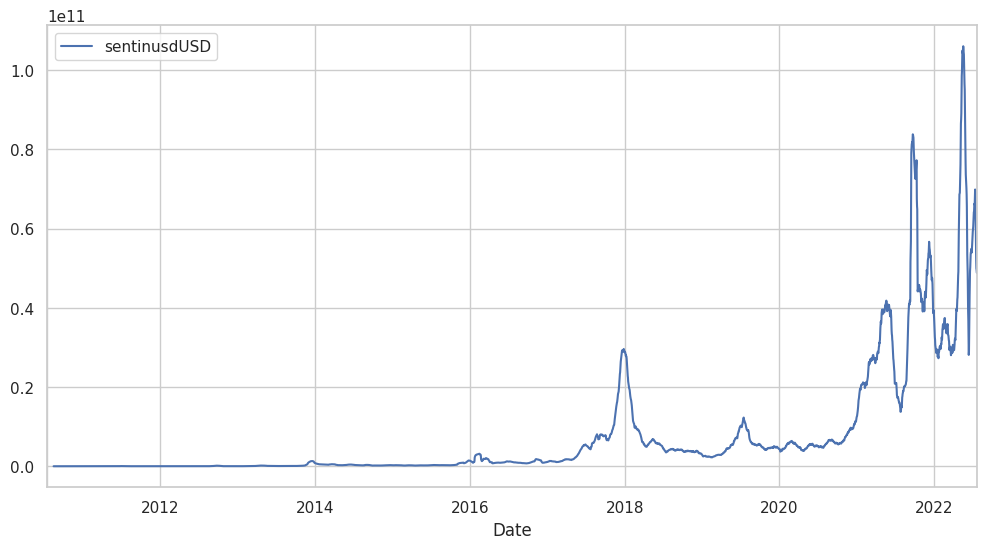

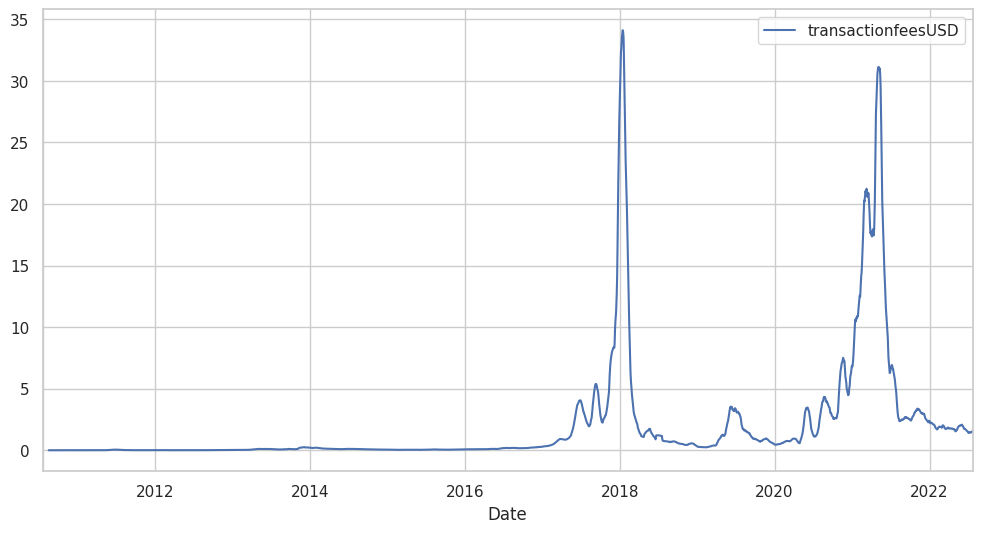

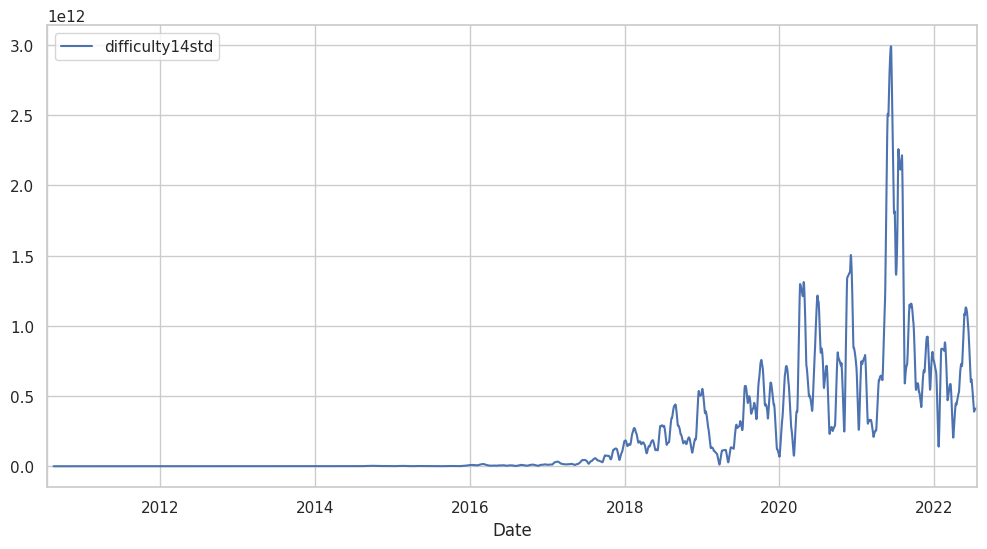

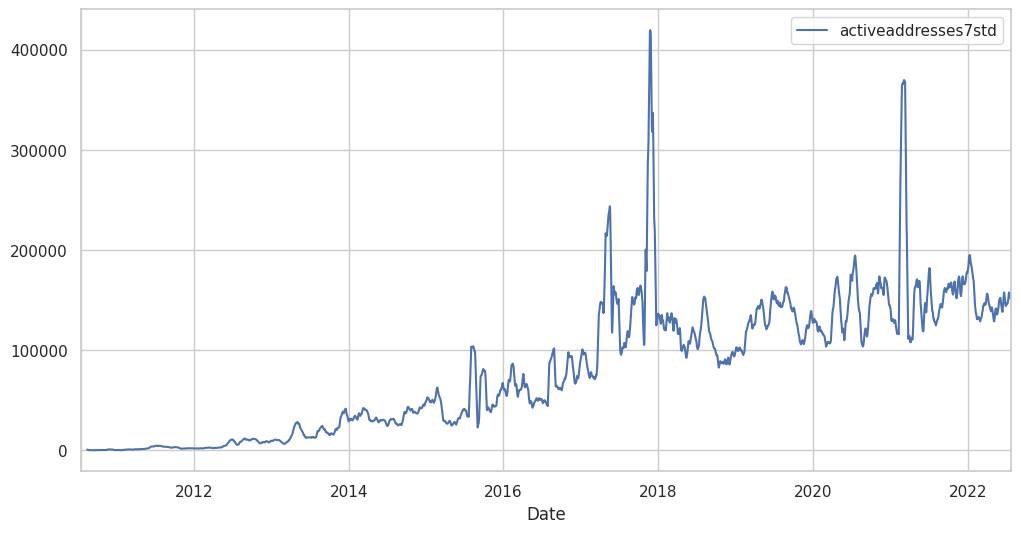

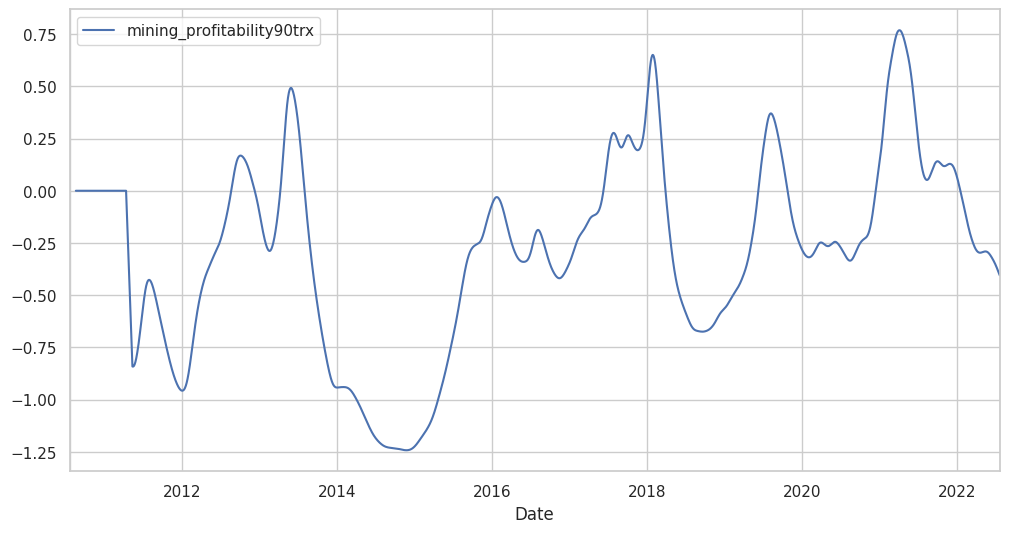

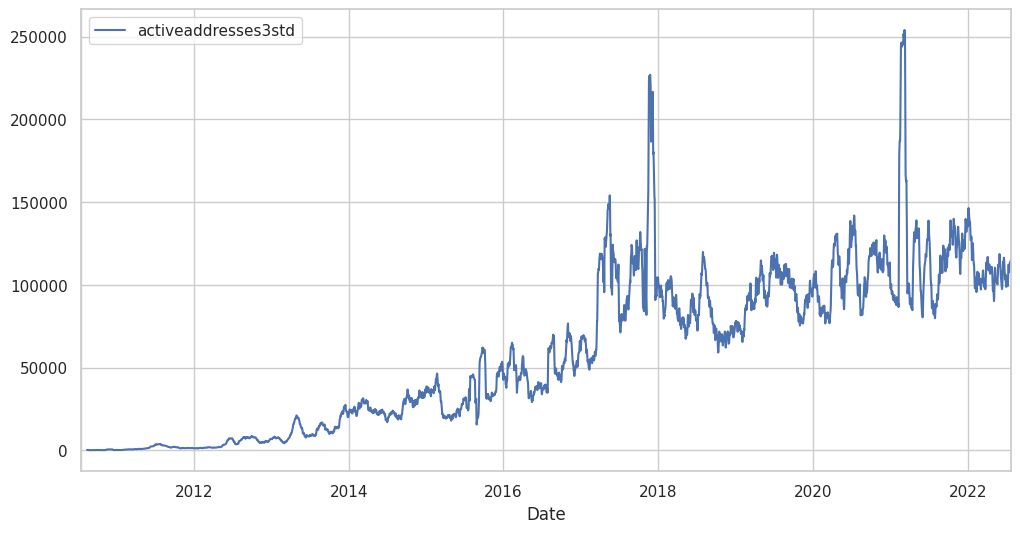

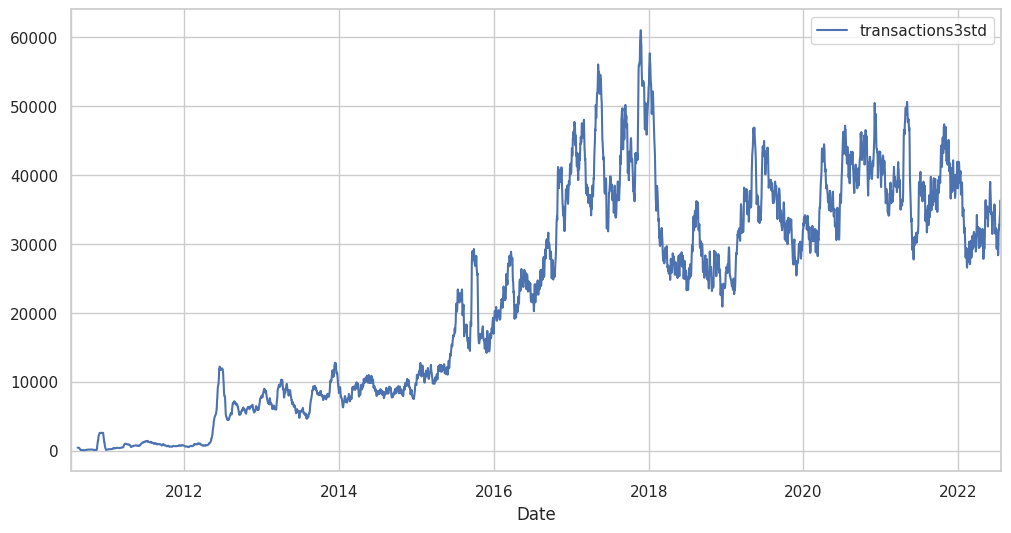

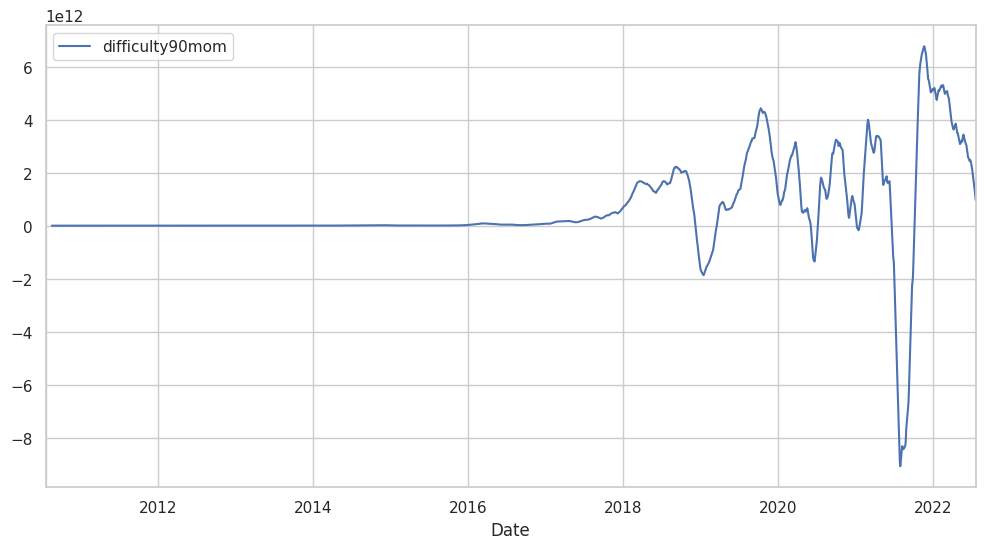

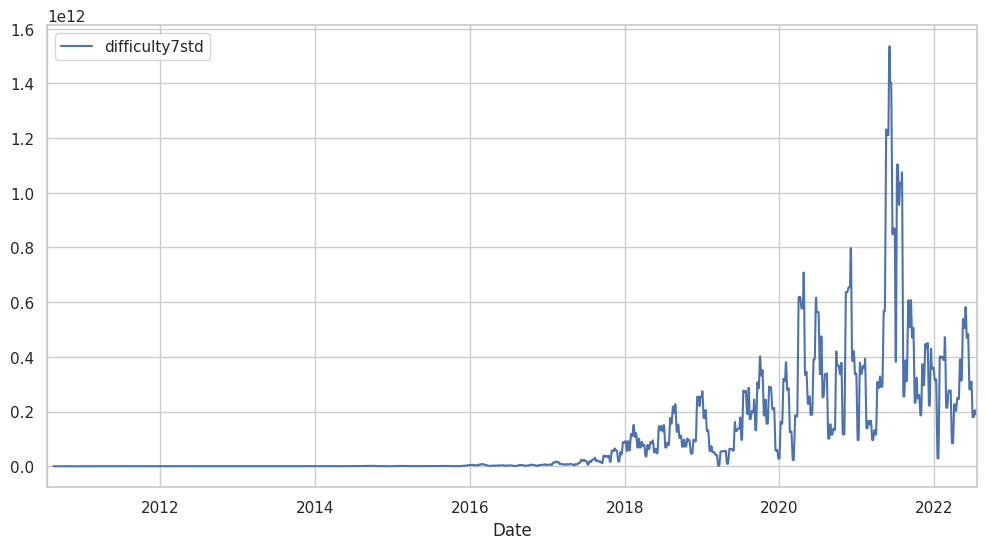

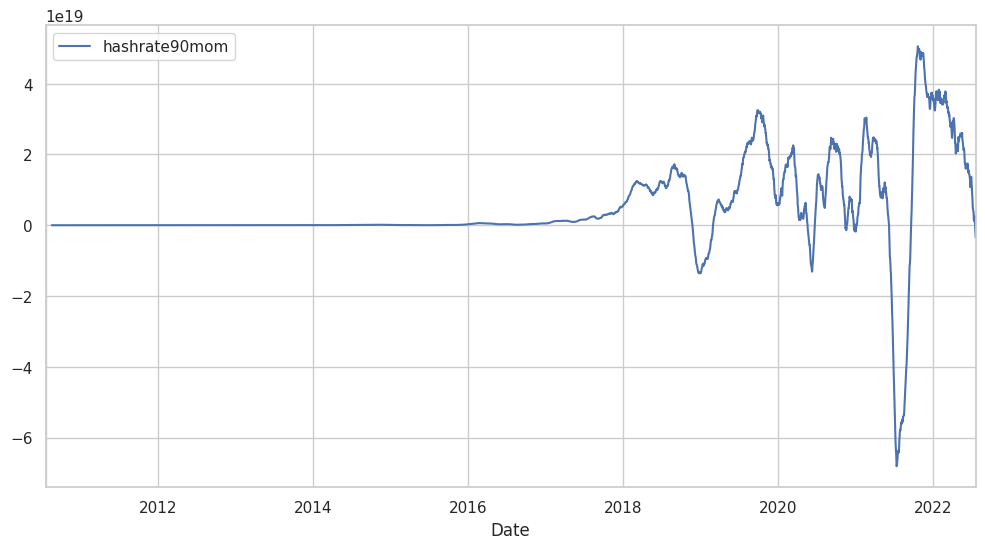

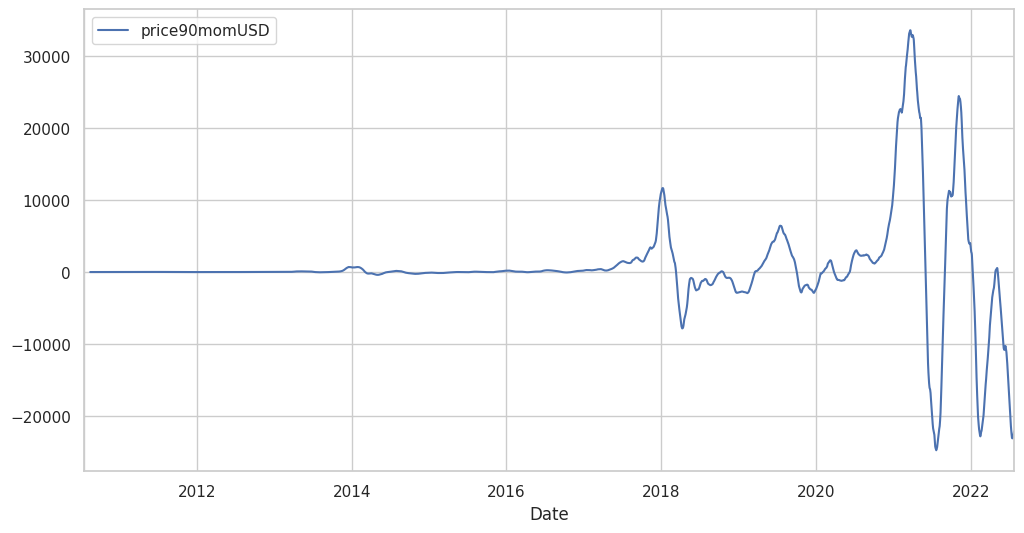

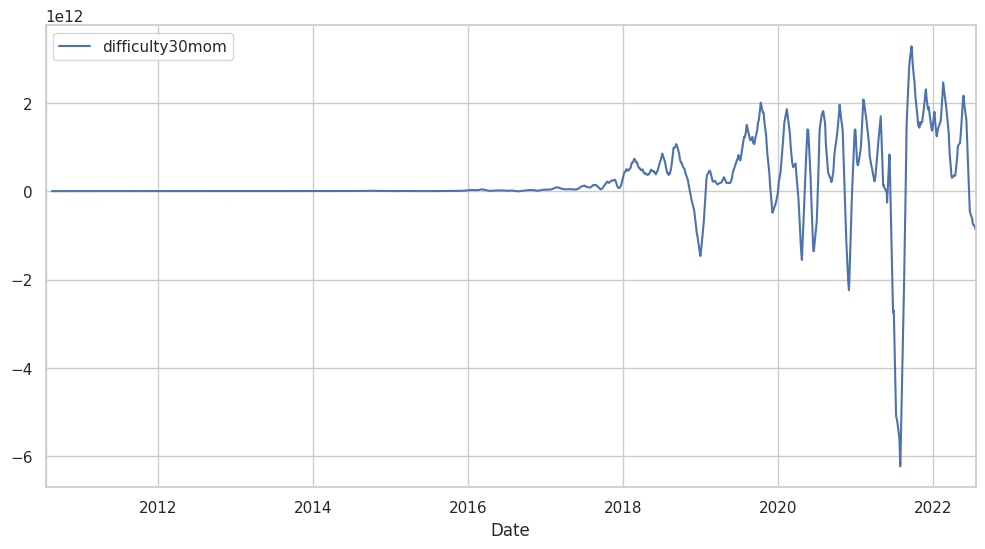

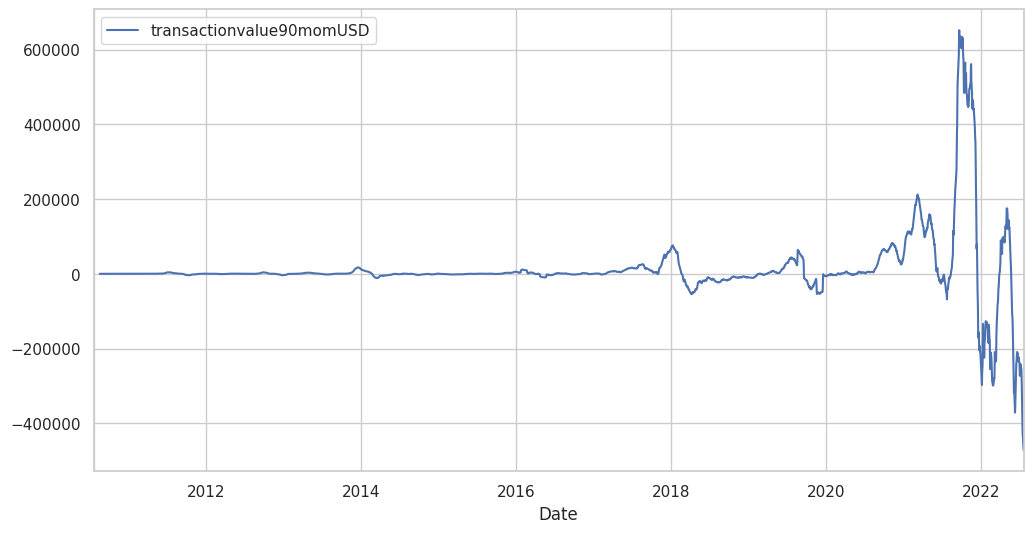

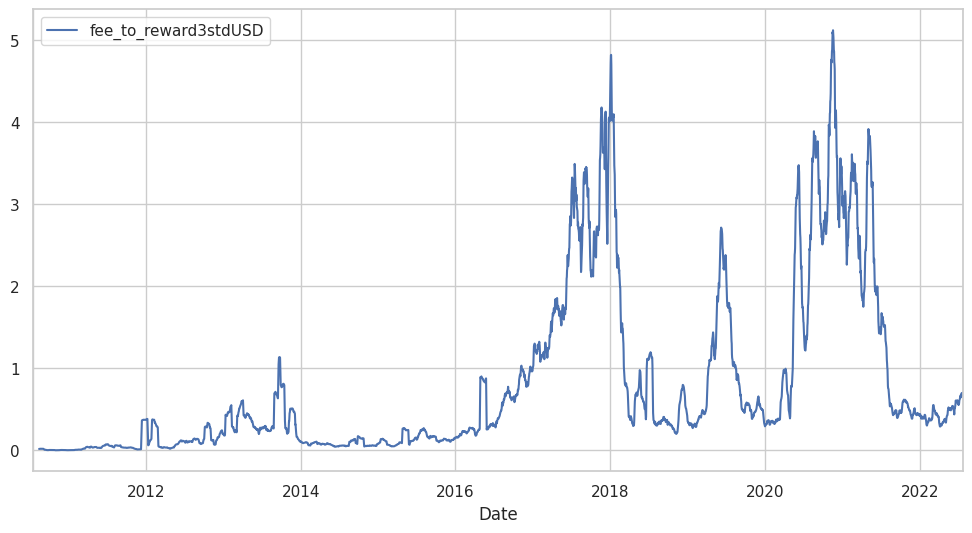

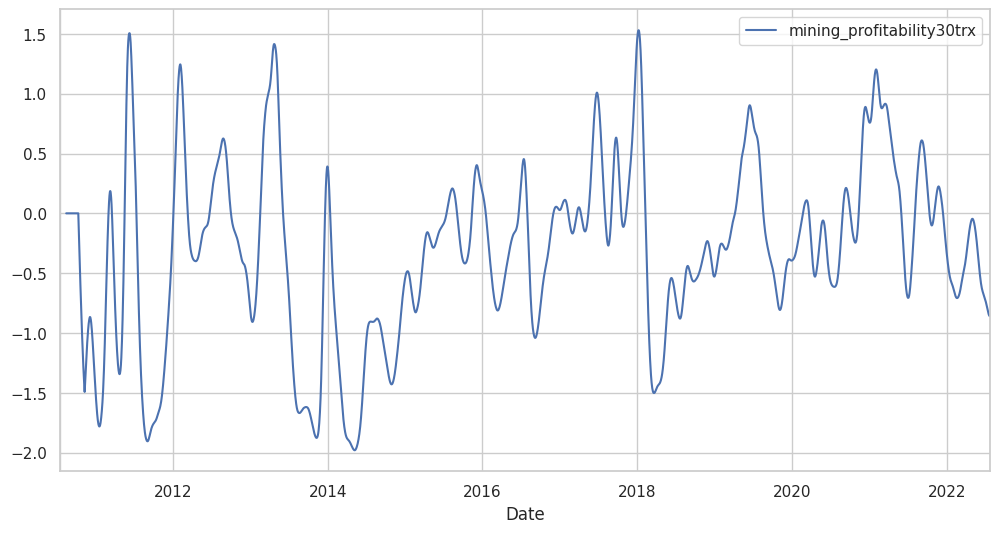

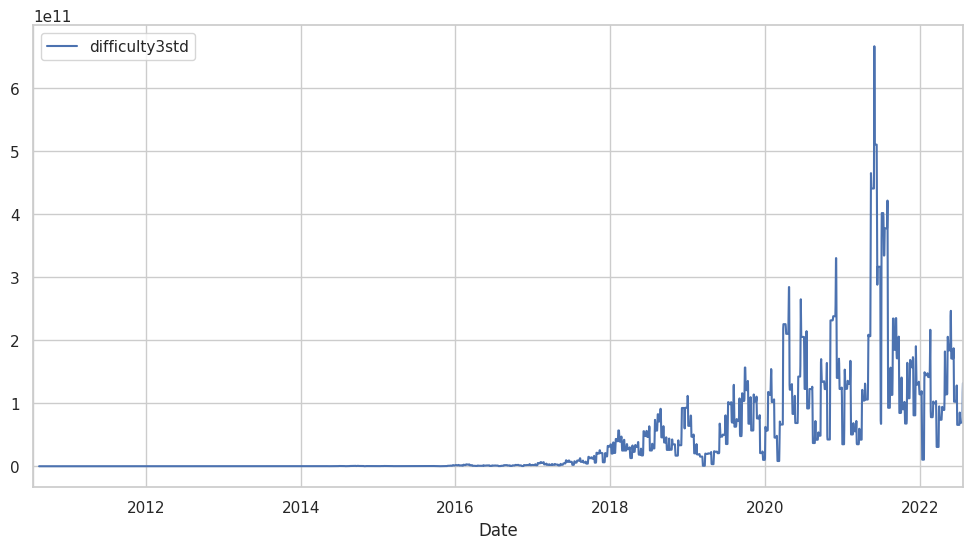

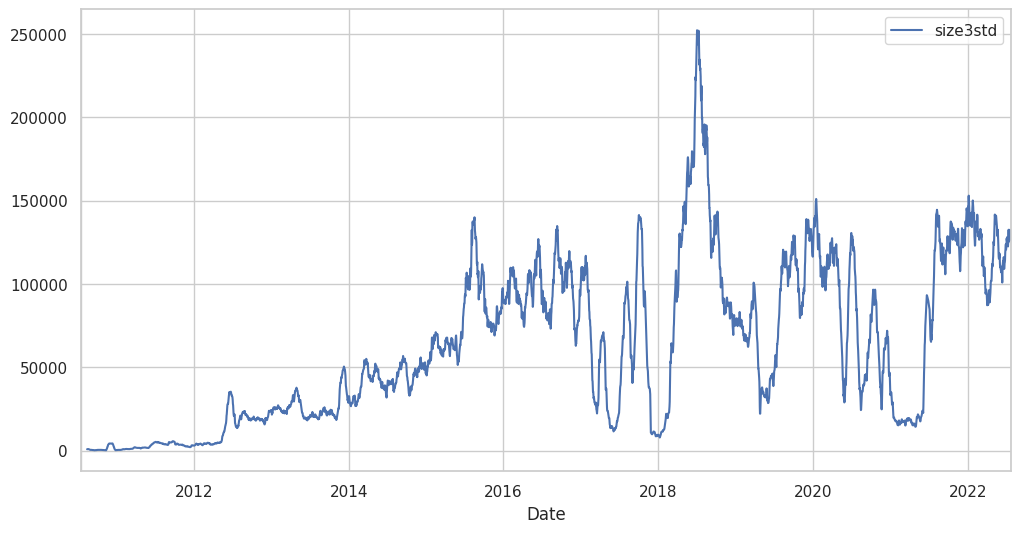

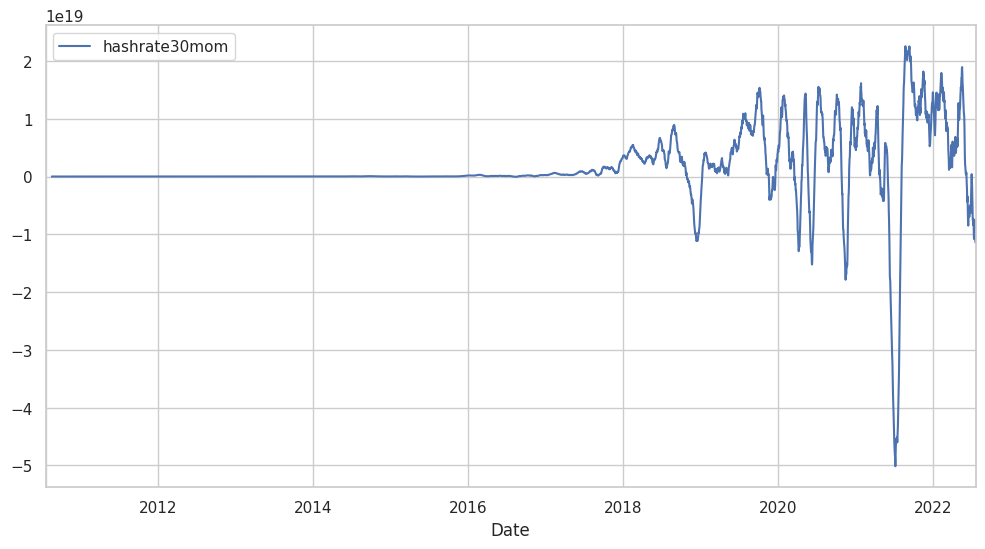

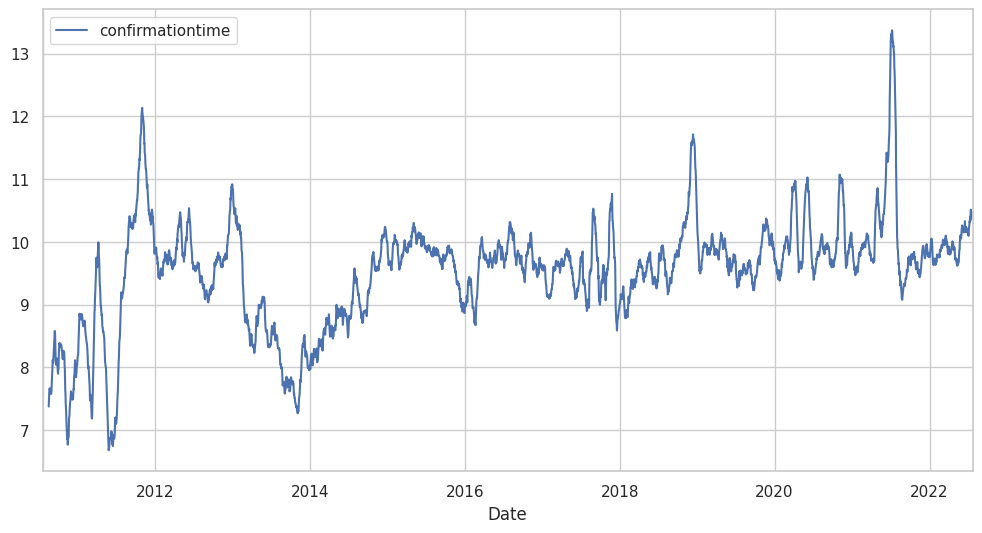

In [25]:
# Visulising the price of BTC 30 day average basis
features=list(X_train.columns)
for i in features:
    sns.set()
    sns.set_style('whitegrid')
    X_train[i].rolling(window=30).mean().plot(figsize=(12,6),label=i)
    plt.legend()
    plt.show()

In [26]:
estimators=[]
estimators.append(['minmax',MinMaxScaler(feature_range=(-1,1))])
scale=Pipeline(estimators)
X_min_max=scale.fit_transform(X_train2)
y_min_max=scale.fit_transform(y)

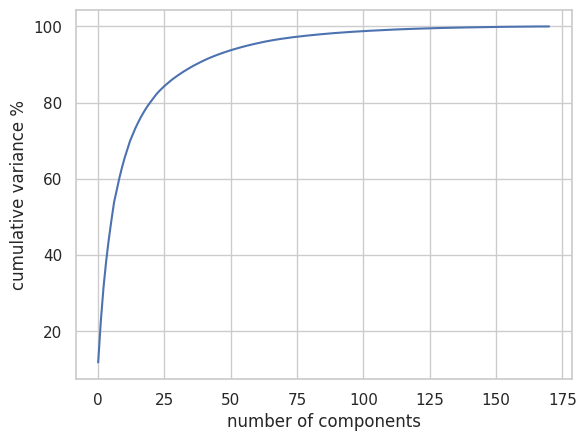

In [27]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0).fit(X_min_max)

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cumulative variance %')
plt.show()

In [28]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11808406, 0.22652295, 0.31393714, 0.38305988, 0.44112468,
       0.49144066, 0.53886926, 0.57112914, 0.60229731, 0.63038133,
       0.65540843, 0.6777327 , 0.69919479, 0.71614617, 0.73250003,
       0.74699938, 0.7607401 , 0.77295127, 0.78448933, 0.79474747,
       0.80415745, 0.81349303, 0.82244375, 0.83016363, 0.83706191,
       0.84378668, 0.84985105, 0.85561075, 0.86129264, 0.86644806,
       0.87136203, 0.87607837, 0.88066309, 0.88502139, 0.88917415,
       0.89323627, 0.89713199, 0.90079105, 0.9043323 , 0.90783871,
       0.91119922, 0.91441106, 0.91749233, 0.92029437, 0.92306572,
       0.92570052, 0.92828894, 0.93071824, 0.93307366, 0.93542163,
       0.93762388, 0.93971428, 0.94173595, 0.94373284, 0.94565385,
       0.94750603, 0.94929728, 0.95103453, 0.95268095, 0.95430117,
       0.95587939, 0.95740589, 0.958896  , 0.96032017, 0.96166799,
       0.96293211, 0.96416764, 0.96534358, 0.96643872, 0.96749598,
       0.96852376, 0.96952268, 0.9704548 , 0.97133946, 0.97220

## Selecting Important Features

In [29]:
# Feature Selection using Extra Tree Regressor
#ref https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(X_min_max, y, random_state=0)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
clf = ExtraTreesRegressor(n_estimators=50, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9990665613203114

In [30]:
feature_importances=[]
for i in clf.feature_importances_:
    feature_importances.append('{:f}'.format(float(i)))

In [31]:
count=0
sum=0
index=[]
for i in range(len(feature_importances)):
    if float(feature_importances[i])>=0.001299:
        #print(i," ",feature_importances[i])
        count+=1
        sum+=float(feature_importances[i])
        index.append(i)

In [32]:
feature_=list(X.columns)
print("List of important features are: ",[feature_[i] for i in index],"\n")
print(sum*100,"%")
print("number of important features usind tree classifier \n",count)

List of important features are:  ['Unnamed: 0', 'mining_profitability', 'sentinusdUSD', 'transactionfeesUSD', 'confirmationtime', 'transactions3trx', 'transactions30trx', 'transactions3mom', 'transactions7mom', 'transactions14mom', 'transactions30mom', 'size30mom', 'size90mom', 'size3std', 'sentbyaddress30trx', 'difficulty14mom', 'difficulty30mom', 'hashrate3trx', 'hashrate14mom', 'hashrate3rsi', 'mining_profitability7mom', 'mining_profitability3rsi', 'transactionfees90trxUSD', 'transactionvalue3rocUSD', 'mediantransactionvalue3rsiUSD', 'mediantransactionvalue90rocUSD', 'top100cap14trx', 'top100cap7std', 'top100cap3roc', 'fee_to_reward3momUSD', 'price14momUSD', 'price30momUSD', 'price90momUSD', 'price3rsiUSD'] 

98.59099999999998 %
number of important features usind tree classifier 
 34


## Comparing and Selecting

In [33]:
print(top_20_features)

['Unnamed: 0', 'sentinusdUSD', 'transactionfeesUSD', 'difficulty14std', 'activeaddresses7std', 'mining_profitability90trx', 'activeaddresses3std', 'transactions3std', 'difficulty90mom', 'difficulty7std', 'hashrate90mom', 'price90momUSD', 'difficulty30mom', 'transactionvalue90momUSD', 'fee_to_reward3stdUSD', 'mining_profitability30trx', 'difficulty3std', 'size3std', 'hashrate30mom', 'confirmationtime']


In [34]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))
print("common important features are")
imp_feature_=intersection(feature_, top_20_features)
print(imp_feature_)
print("Total imp features are",len(imp_feature_))

common important features are
['confirmationtime', 'difficulty7std', 'activeaddresses3std', 'activeaddresses7std', 'difficulty3std', 'transactionfeesUSD', 'size3std', 'hashrate30mom', 'mining_profitability30trx', 'hashrate90mom', 'fee_to_reward3stdUSD', 'difficulty30mom', 'price90momUSD', 'sentinusdUSD', 'mining_profitability90trx', 'difficulty90mom', 'transactions3std', 'transactionvalue90momUSD', 'difficulty14std', 'Unnamed: 0']
Total imp features are 20


# Feature Engineering

In [35]:
train_data_=df[["priceUSD",'sentinusd90momUSD', 'hashrate90mom', 'difficulty90mom', 'activeaddresses7std', 'difficulty7std', 'price14momUSD', 'sentinusdUSD', 'transactionvalue3stdUSD', 'activeaddresses3std', 'transactions3std', 'price30momUSD', 'fee_to_reward3stdUSD', 'mining_profitability90trx', 'sentinusd30momUSD', 'transactionvalue30momUSD', 'transactions', 'difficulty', 'difficulty14std', 'difficulty30mom', 'mining_profitability30trx']]

In [36]:
train_data_

priceUSD  sentinusd90momUSD  hashrate90mom  difficulty90mom  \
Date                                                                        
2010-07-18      0.0726       0.000000e+00   1.467781e+09     1.737230e+02   
2010-07-19      0.0859       0.000000e+00   1.466614e+09     1.737230e+02   
2010-07-20      0.0783       0.000000e+00   1.553496e+09     1.735570e+02   
2010-07-21      0.0767       0.000000e+00   1.613749e+09     1.700790e+02   
2010-07-22      0.0649       0.000000e+00   1.621318e+09     1.700790e+02   
...                ...                ...            ...              ...   
2022-07-19  22514.0000       3.906392e+09  -1.267260e+19     9.268707e+11   
2022-07-20  23568.0000      -5.213508e+10  -3.853800e+19     9.268707e+11   
2022-07-21  22936.0000      -6.147294e+10  -2.875793e+19     6.012077e+11   
2022-07-22  23145.0000      -3.755837e+09  -2.866946e+19    -5.333602e+11   
2022-07-23  22512.0000      -3.269234e+10  -3.870029e+19    -5.333602e+11   

            activeaddresses7std  difficulty7std  price14momUSD  sentinusdUSD  \
Date                                                                           
2010-07-18             3836.000    1.275940e+02          0.000  2.612000e+03   
2010-07-19             3872.000    1.338740e+02          0.000  4.047000e+03   
2010-07-20             3973.000    1.295820e+02          0.000  2.341000e+03   
2010-07-21              910.003    1.157030e+02          0.000  2.122000e+03   
2010-07-22              652.409    8.340300e+01          0.000  2.570000e+03   
...                         ...             ...            ...           ...   
2022-07-19           194475.000    3.852714e+06       2518.000  5.415818e+10   
2022-07-20           186298.000    3.852714e+06       3399.000  4.309965e+10   
2022-07-21           178152.000    2.279166e+11       2169.000  5.569455e+10   
2022-07-22           169728.000    1.009299e+12       1393.000  5.839661e+10   
2022-07-23           166542.000    1.279570e+12        896.801  4.852391e+10   

            transactionvalue3stdUSD  activeaddresses3std  ...  price30momUSD  \
Date                                                      ...                  
2010-07-18                    0.000              806.213  ...            0.0   
2010-07-19                    3.972              139.870  ...            0.0   
2010-07-20                    3.070               57.743  ...            0.0   
2010-07-21                    3.252              133.889  ...            0.0   
2010-07-22                    2.151              256.262  ...            0.0   
...                             ...                  ...  ...            ...   
2022-07-19                96131.000           216592.000  ...         3249.0   
2022-07-20                47620.000           114188.000  ...         3276.0   
2022-07-21                66956.000            94111.000  ...         1936.0   
2022-07-22                67436.000            94359.000  ...         2835.0   
2022-07-23                39402.000           130208.000  ...         2001.0   

            fee_to_reward3stdUSD  mining_profitability90trx  \
Date                                                          
2010-07-18                 0.000                      0.000   
2010-07-19                 0.014                      0.000   
2010-07-20                 0.015                      0.000   
2010-07-21                 0.001                      0.000   
2010-07-22                 0.000                      0.000   
...                          ...                        ...   
2022-07-19                 0.832                     -0.432   
2022-07-20                 0.419                     -0.434   
2022-07-21                 0.369                     -0.436   
2022-07-22                 0.499                     -0.438   
2022-07-23                 1.194                     -0.440   

            sentinusd30momUSD  transactionvalue30momUSD  transactions  \
Date                                 

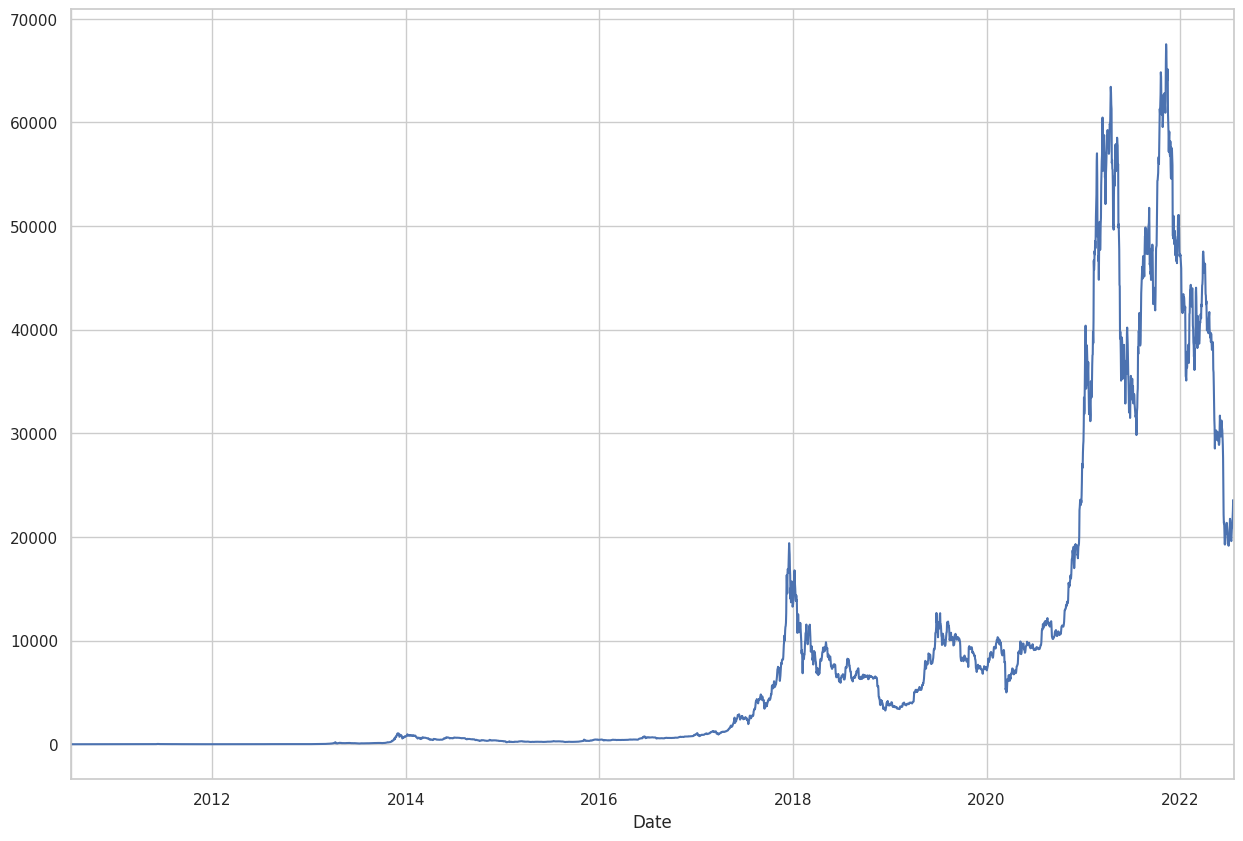

In [37]:
train_data_.sort_index()['2010':'2022']["priceUSD"].plot(subplots=True, figsize=(15,10))
plt.savefig('bitcoin.png')
plt.show()

## Percent Change

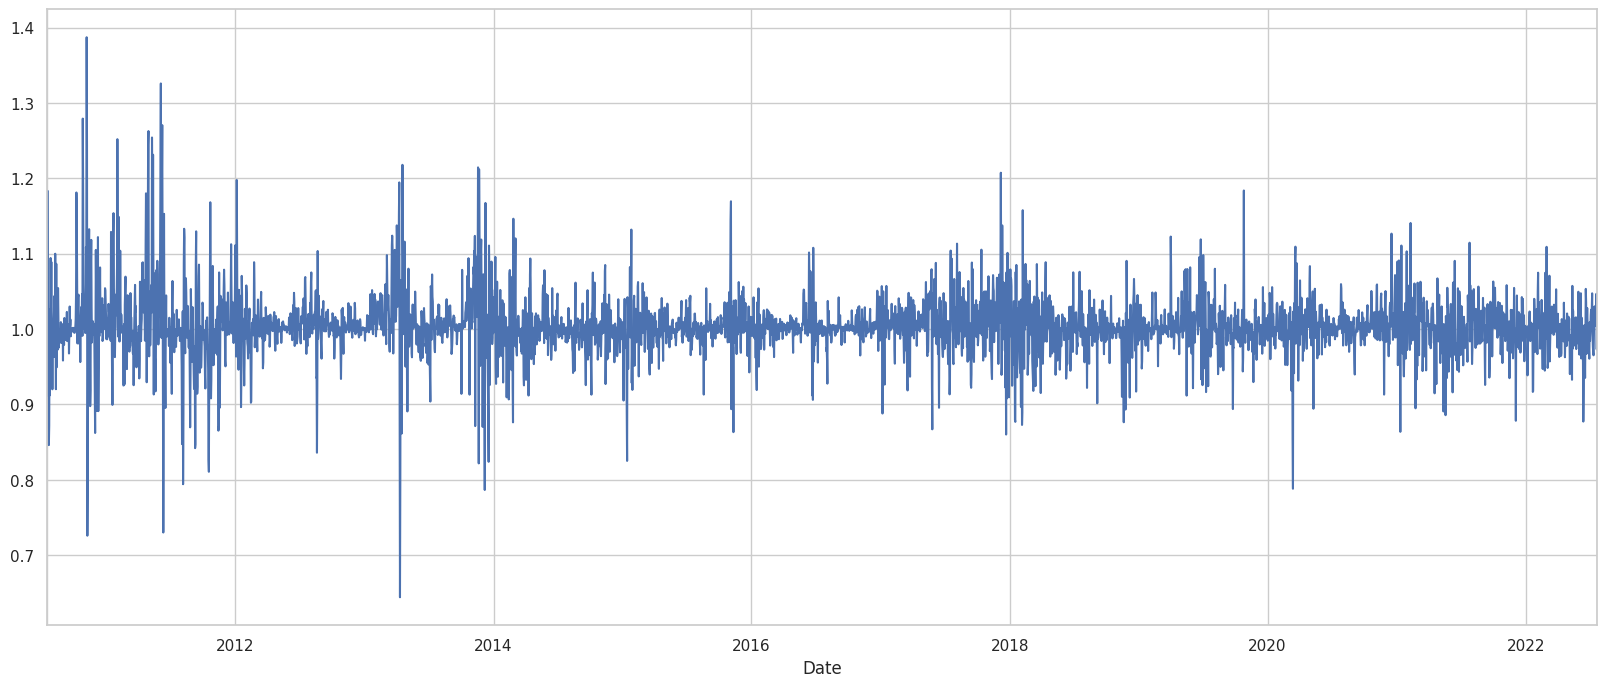

In [38]:
#train_data_['Change'] = train_data_.priceUSD.div(train_data_.priceUSD.shift())
train_data_ = train_data_.assign(Change=pd.Series(train_data_.priceUSD.div(train_data_.priceUSD.shift())))
train_data_['Change'].plot(figsize=(20,8))
plt.show()

## Expanding Mean

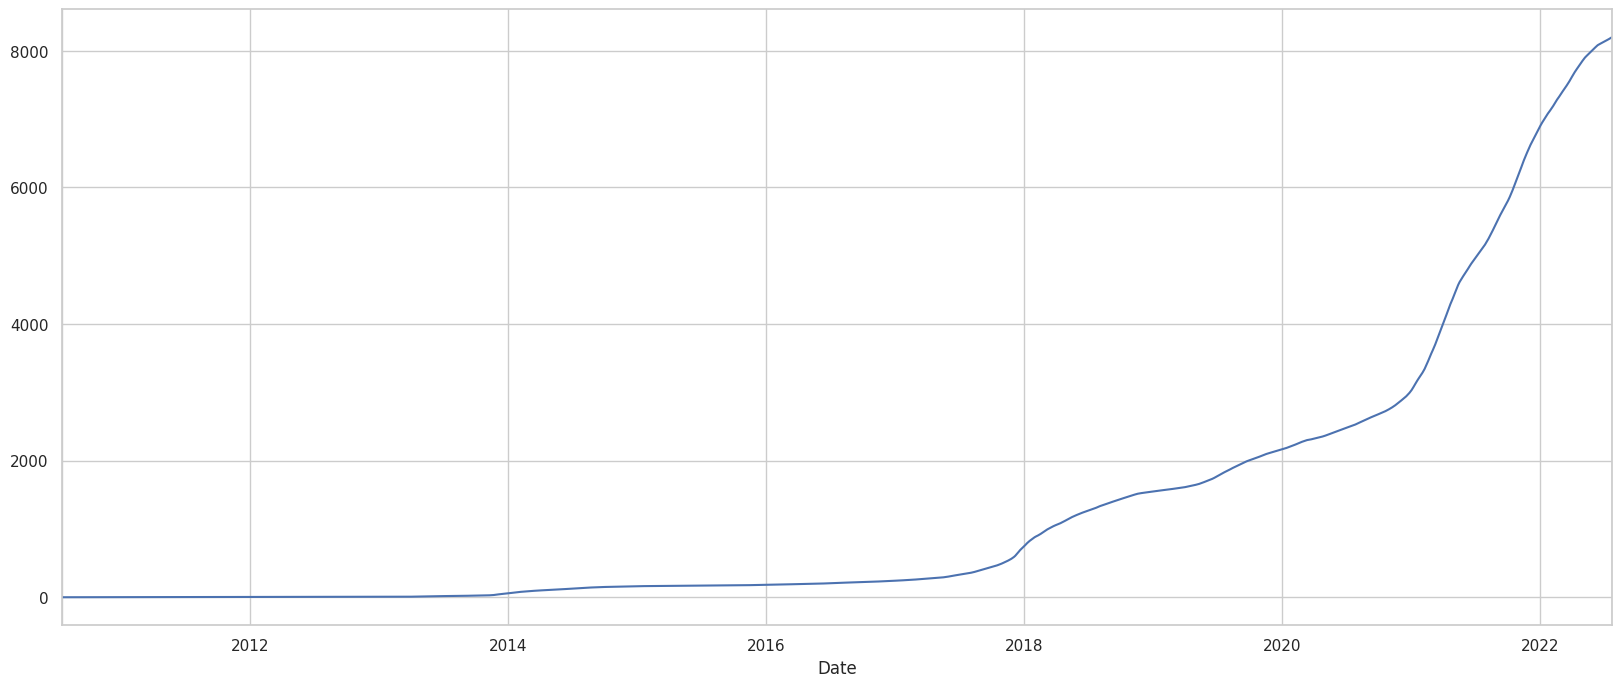

In [39]:
#train_data_['expanding_mean'] = train_data_['priceUSD'].expanding(1).mean()
train_data_ = train_data_.assign(expanding_mean=pd.Series(train_data_['priceUSD'].expanding(1).mean()))
train_data_['expanding_mean'].plot(figsize=(20,8))
plt.show()

## Lag Feature

In [40]:
train_data_['lag_1'] = train_data_['priceUSD'].shift(1)
train_data_['lag_2'] = train_data_['priceUSD'].shift(2)
train_data_['lag_3'] = train_data_['priceUSD'].shift(3)
train_data_['lag_4'] = train_data_['priceUSD'].shift(4)
train_data_['lag_5'] = train_data_['priceUSD'].shift(5)
train_data_['lag_6'] = train_data_['priceUSD'].shift(6)
train_data_['lag_7'] = train_data_['priceUSD'].shift(7)

## Return

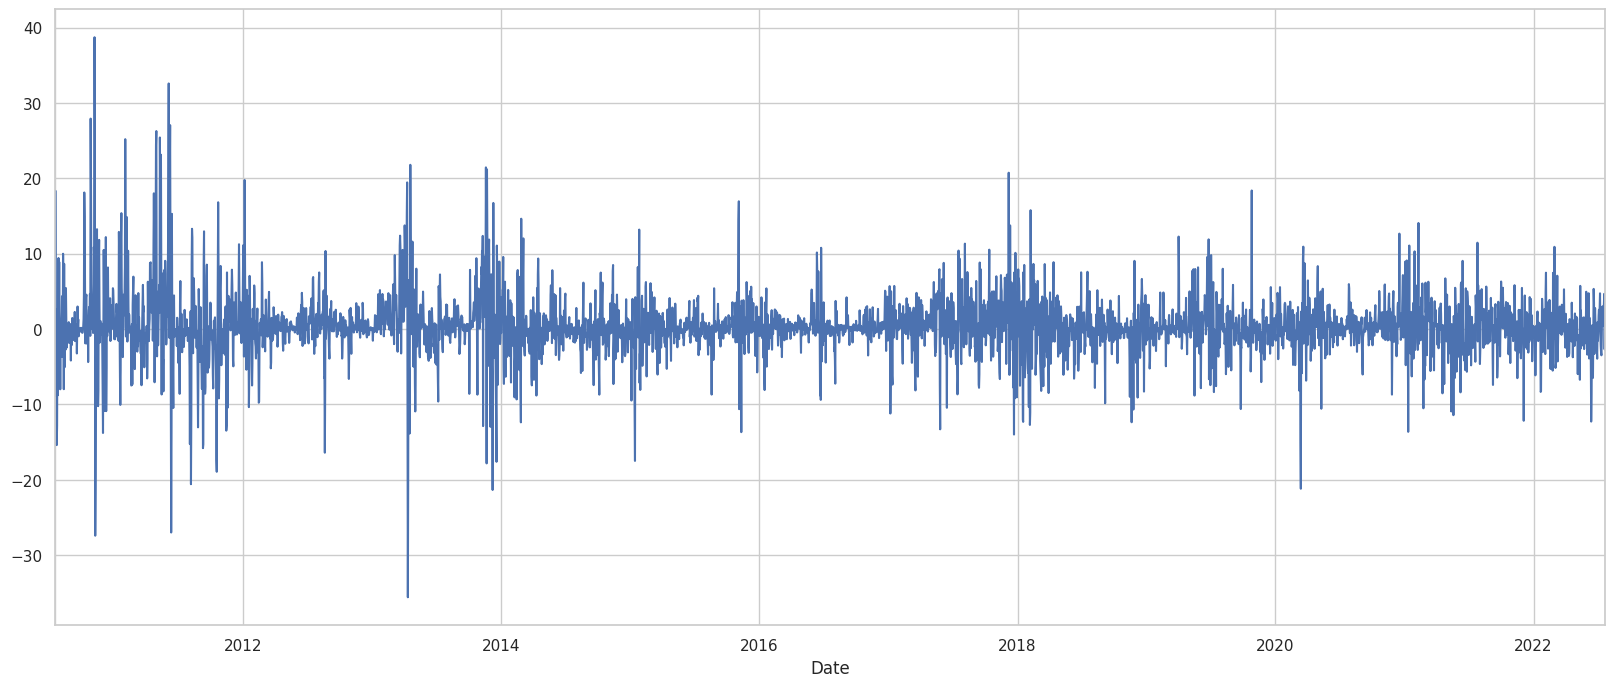

In [41]:
train_data_ = train_data_.assign(Return=pd.Series(train_data_.Change.sub(1).mul(100)))
train_data_['Return'].plot(figsize=(20,8))
plt.show()

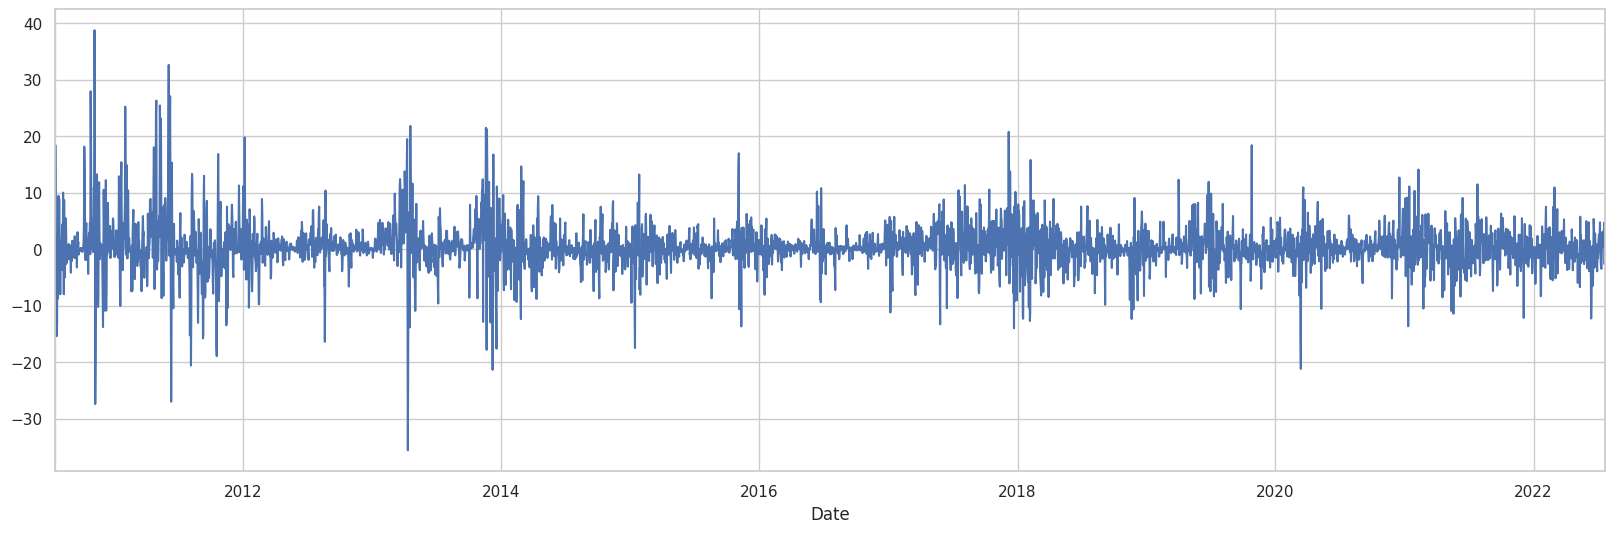

In [42]:
train_data_.priceUSD.pct_change().mul(100).plot(figsize=(20,6))
plt.show()

## Window Functions

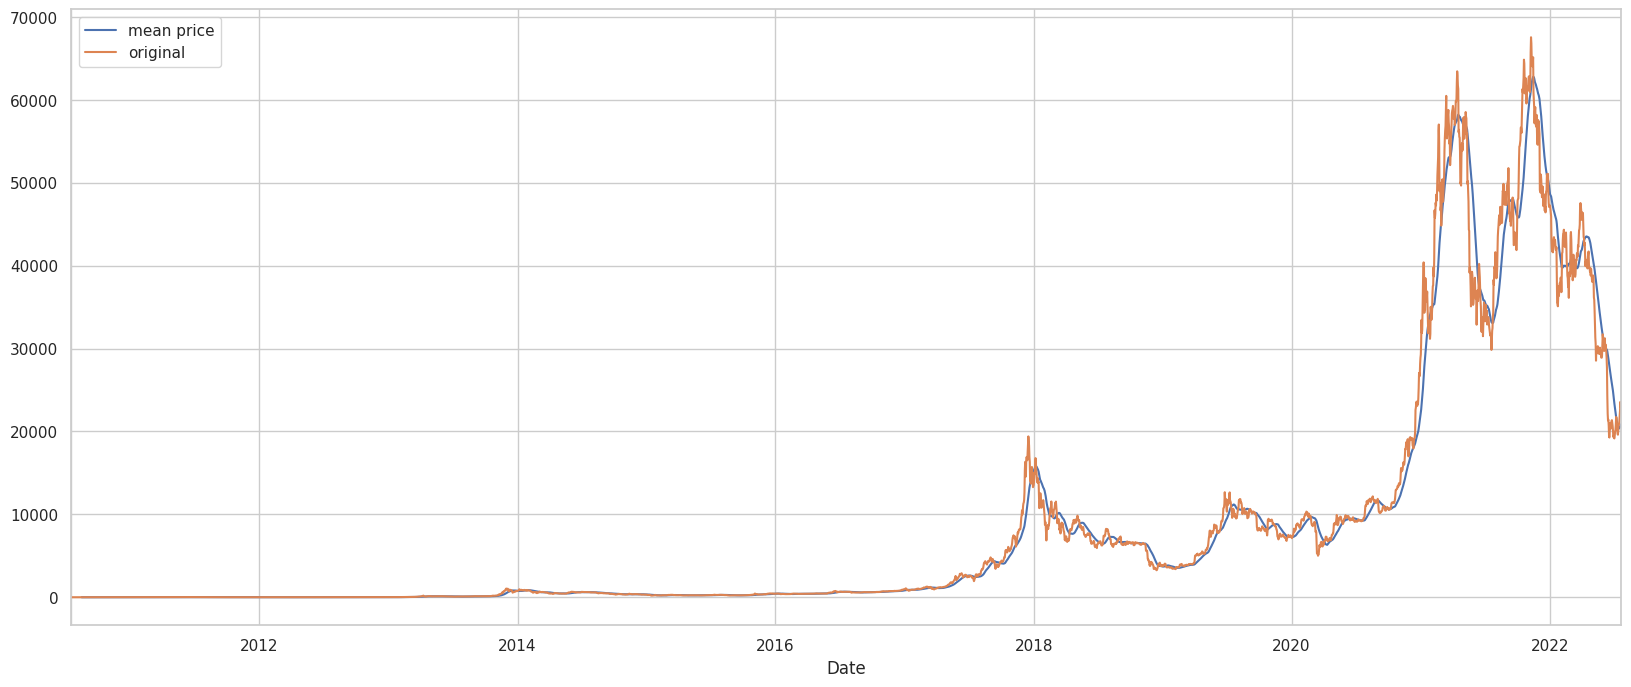

In [43]:
train_data_ = train_data_.assign(Mean=pd.Series(train_data_['priceUSD'].rolling(window=30).mean()))
train_data_['Mean'].plot(figsize=(20,8),label='mean price')
train_data_['priceUSD'].plot(label='original')
plt.legend()
plt.show()

## Time Series decomposition and Random walks

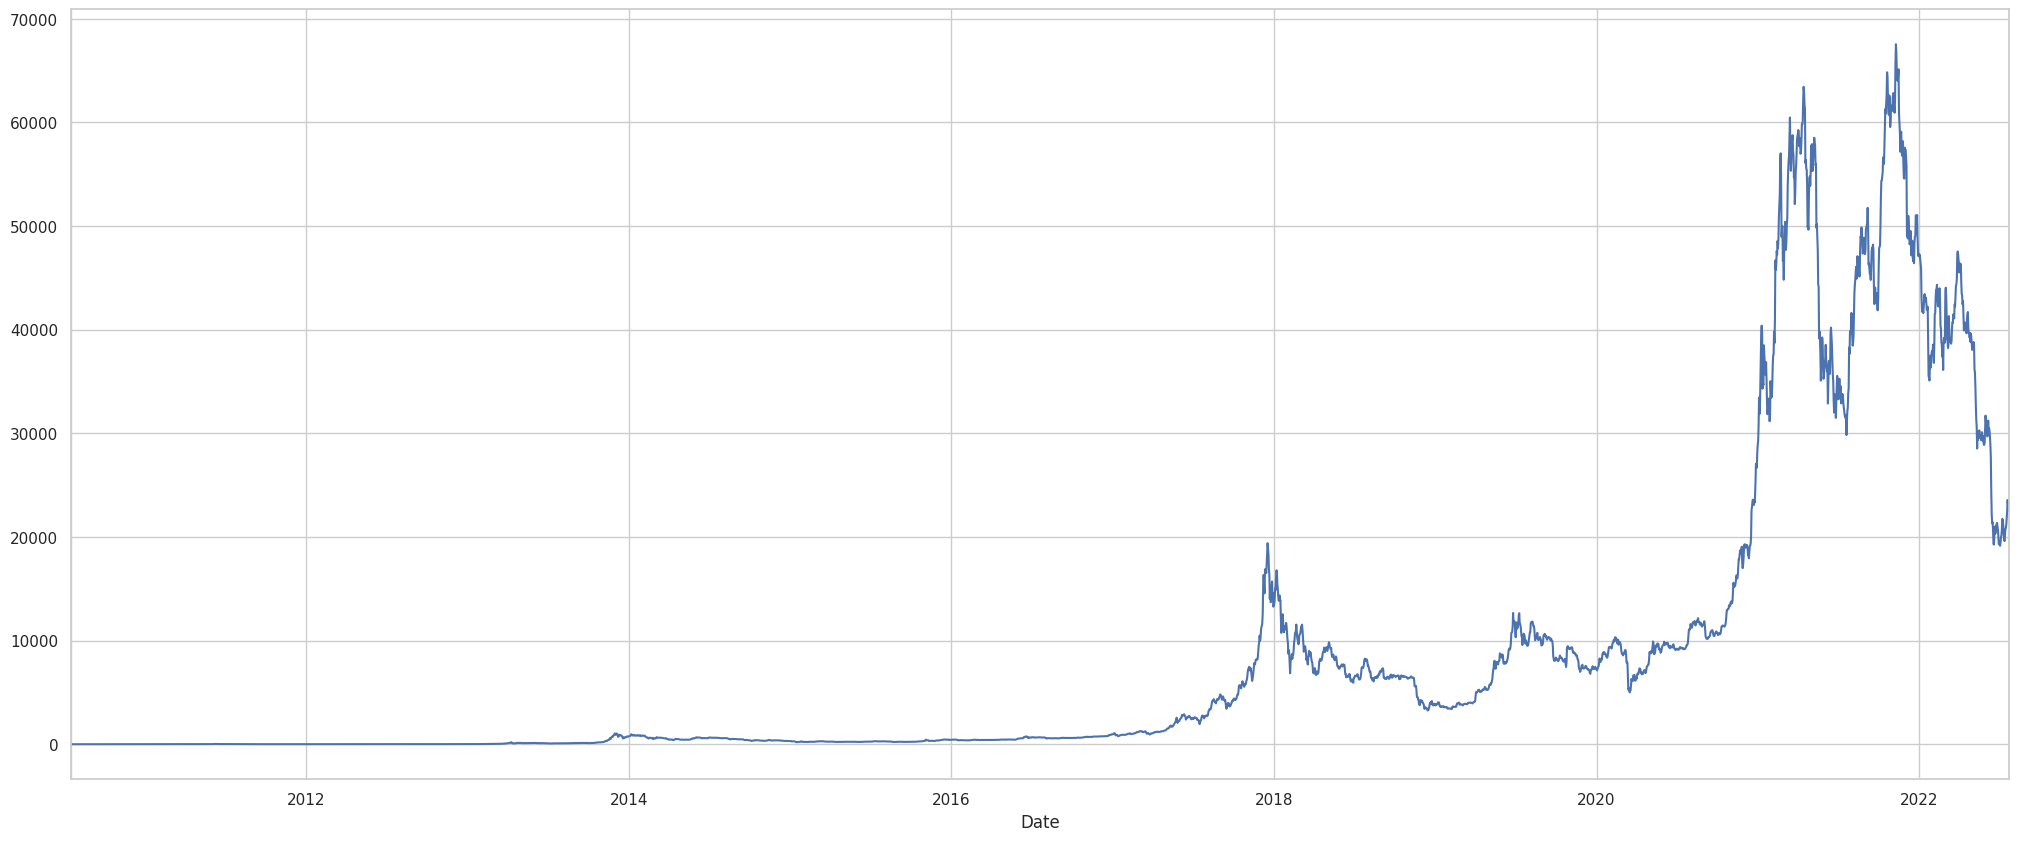

In [44]:
train_data_["priceUSD"].plot(figsize=(25,10))
plt.show()

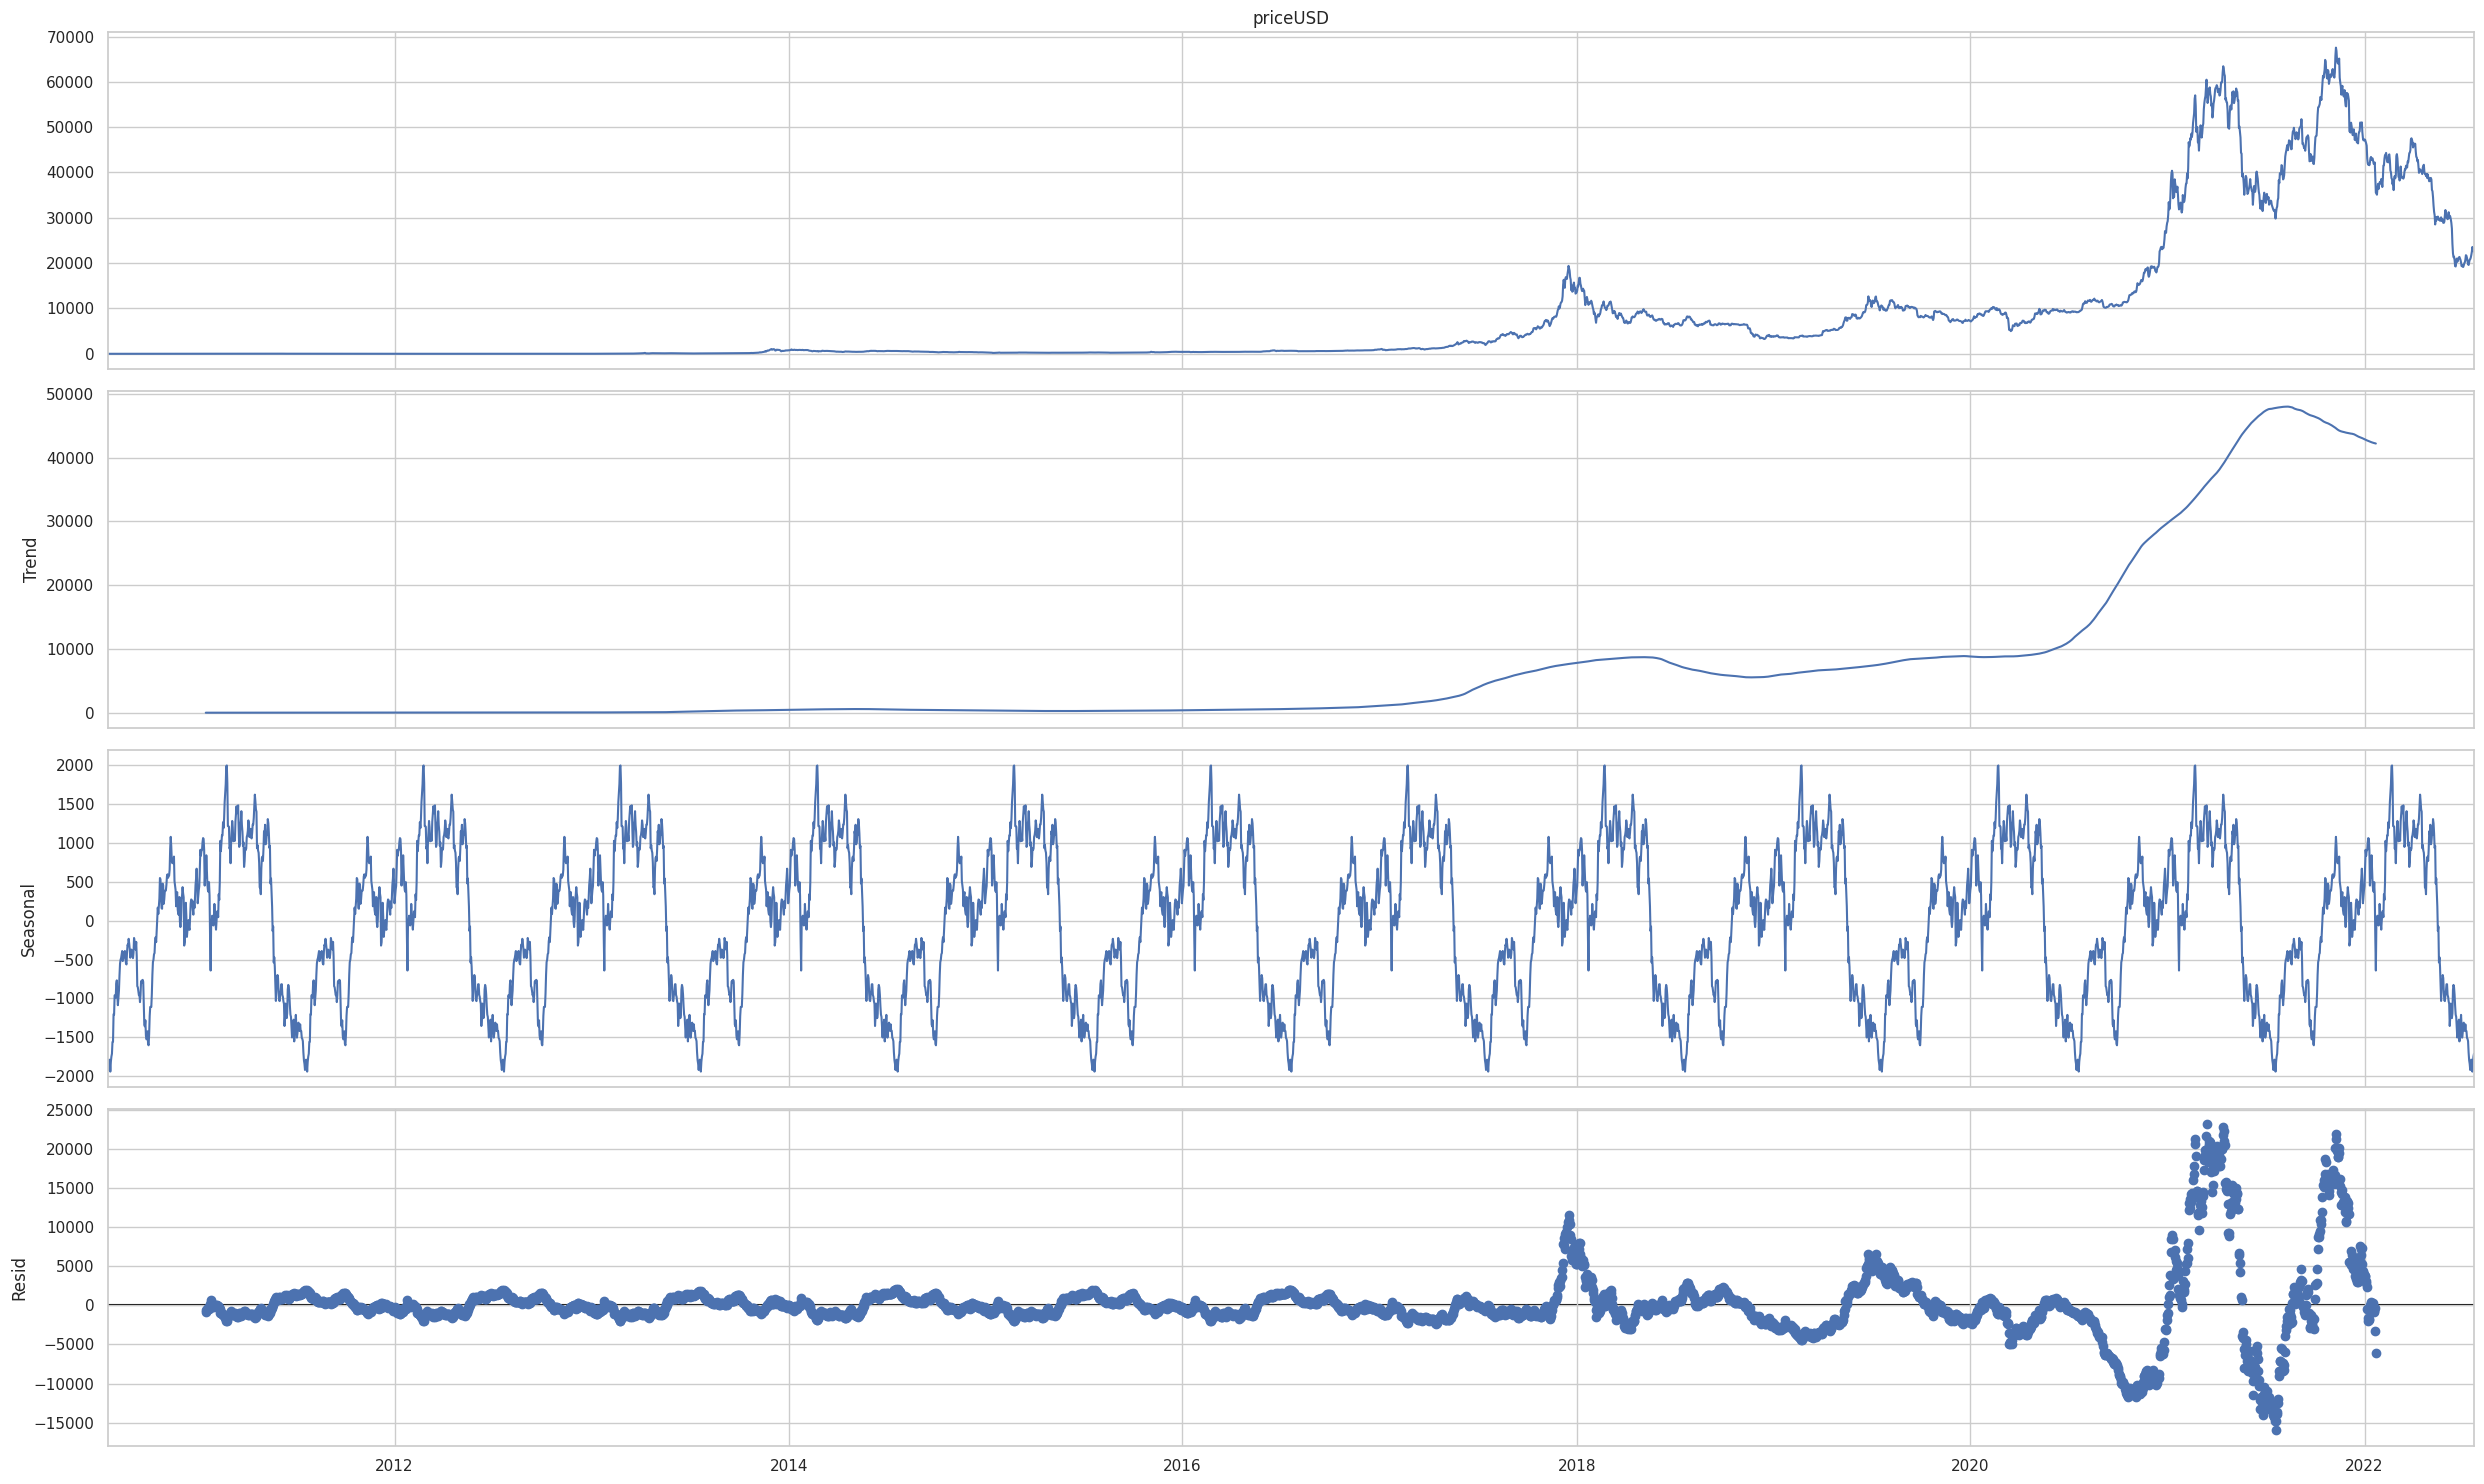

In [45]:
# Now, for decomposition...
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 25, 15
decomposed_train_data_ = sm.tsa.seasonal_decompose(train_data_["priceUSD"],period=365) # The frequncy is annual
figure = decomposed_train_data_.plot()
plt.show()

In [46]:
train_data_.isnull().values.any()

True

In [47]:
train_data_.dropna(axis = 0, how ='any',inplace=True)
train_data_.isnull().values.any()

False

In [48]:
train_data_["priceUSD"].describe()

count     4360.000000
mean      8252.519528
std      14625.003704
min          0.059900
25%        119.383000
50%        673.850000
75%       8778.500000
max      67547.000000
Name: priceUSD, dtype: float64

Text(0.5, 1.0, 'detrended by subtracting the least squares fit')

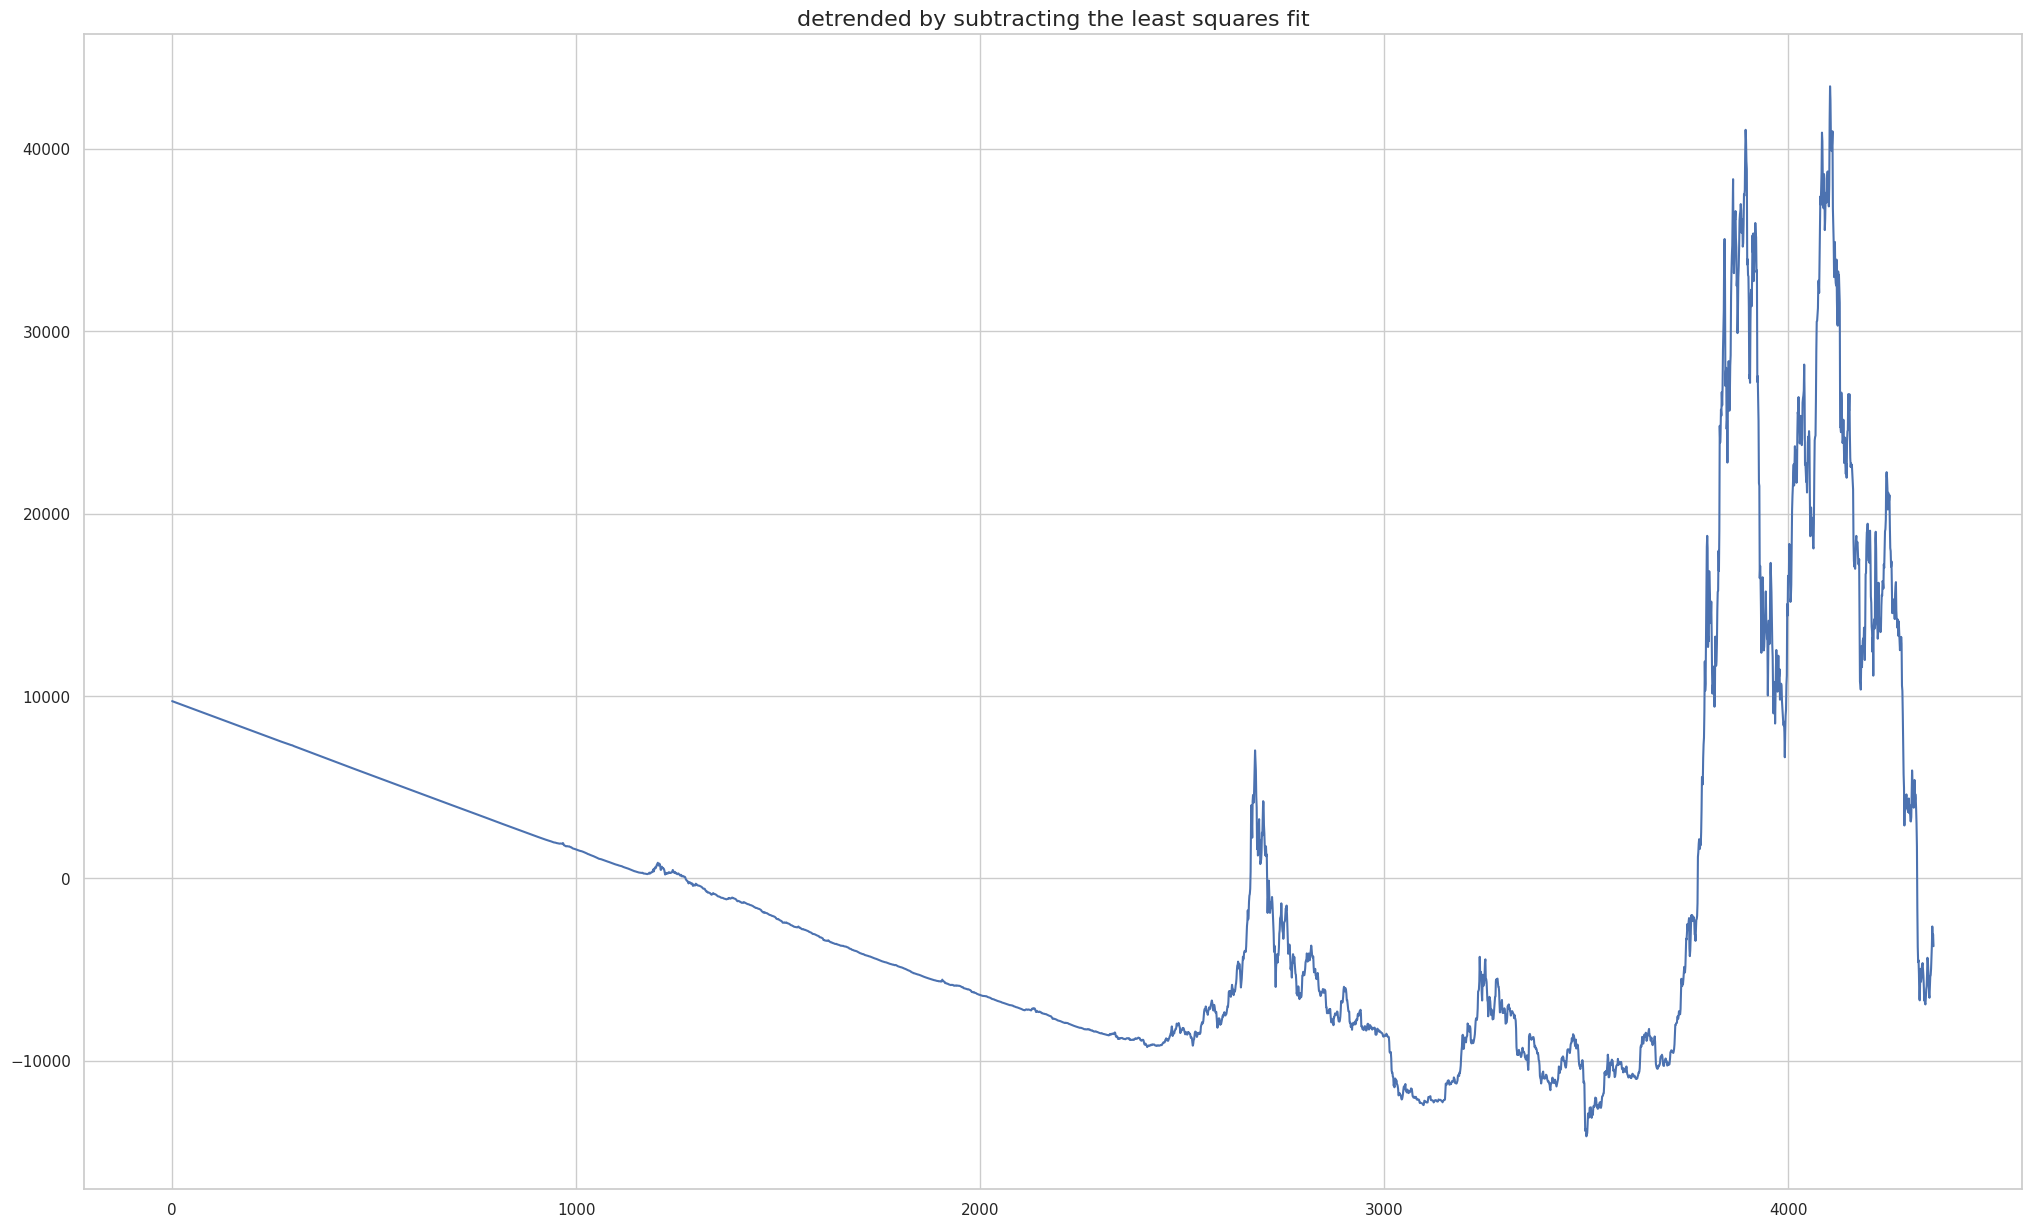

In [49]:
from scipy import signal
detrended = signal.detrend(train_data_["priceUSD"].values)
plt.plot(detrended)
plt.title('detrended by subtracting the least squares fit', fontsize=16)

In [50]:
# Plotting white noise
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
series = Series(train_data_["priceUSD"])
# summary stats
print(train_data_["priceUSD"].describe())

count     4360.000000
mean      8252.519528
std      14625.003704
min          0.059900
25%        119.383000
50%        673.850000
75%       8778.500000
max      67547.000000
Name: priceUSD, dtype: float64


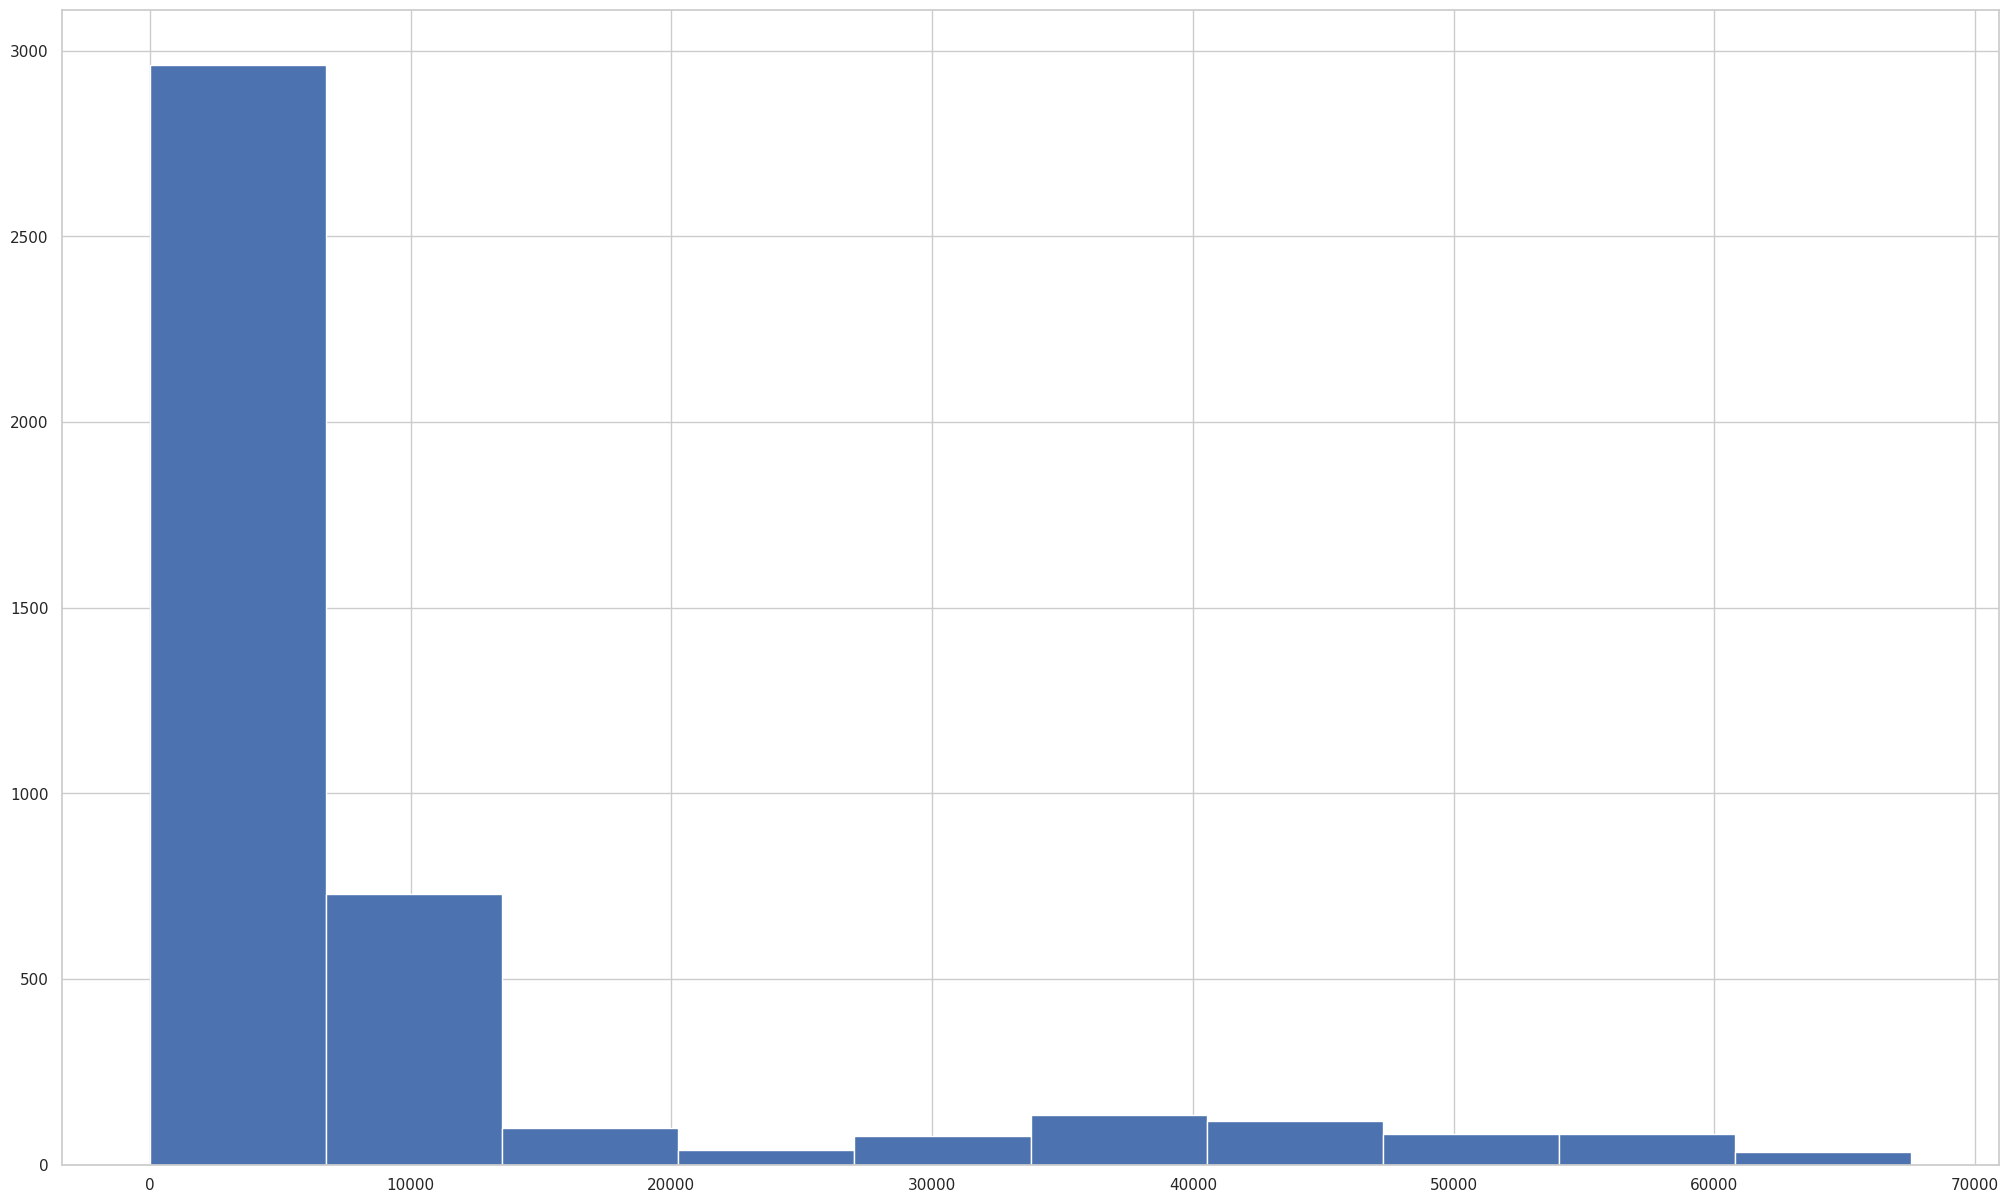

In [51]:
# histogram plot
series.hist()
plt.show()

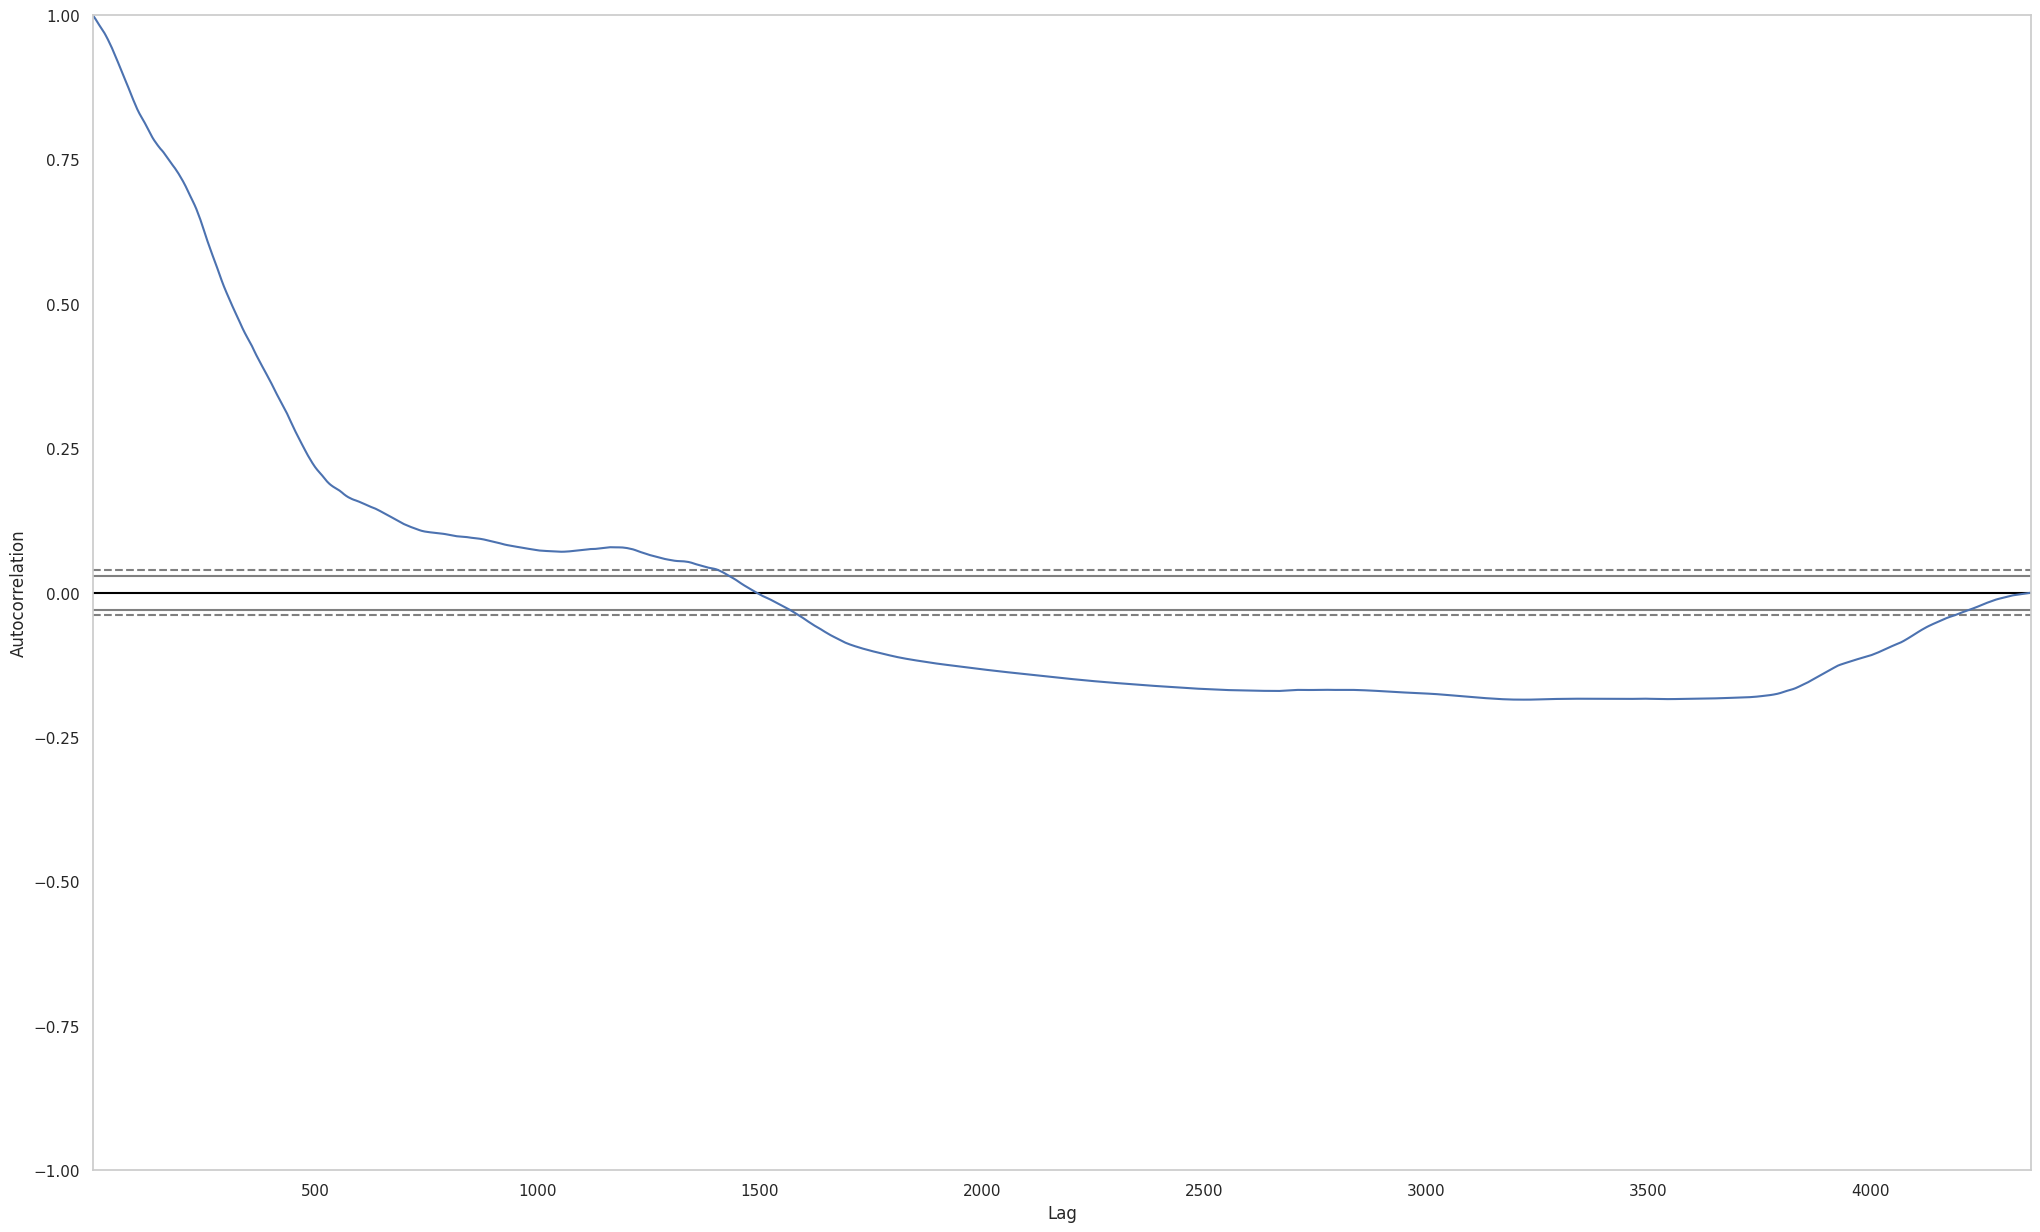

In [52]:
# autocorrelation
autocorrelation_plot(series)
plt.show()

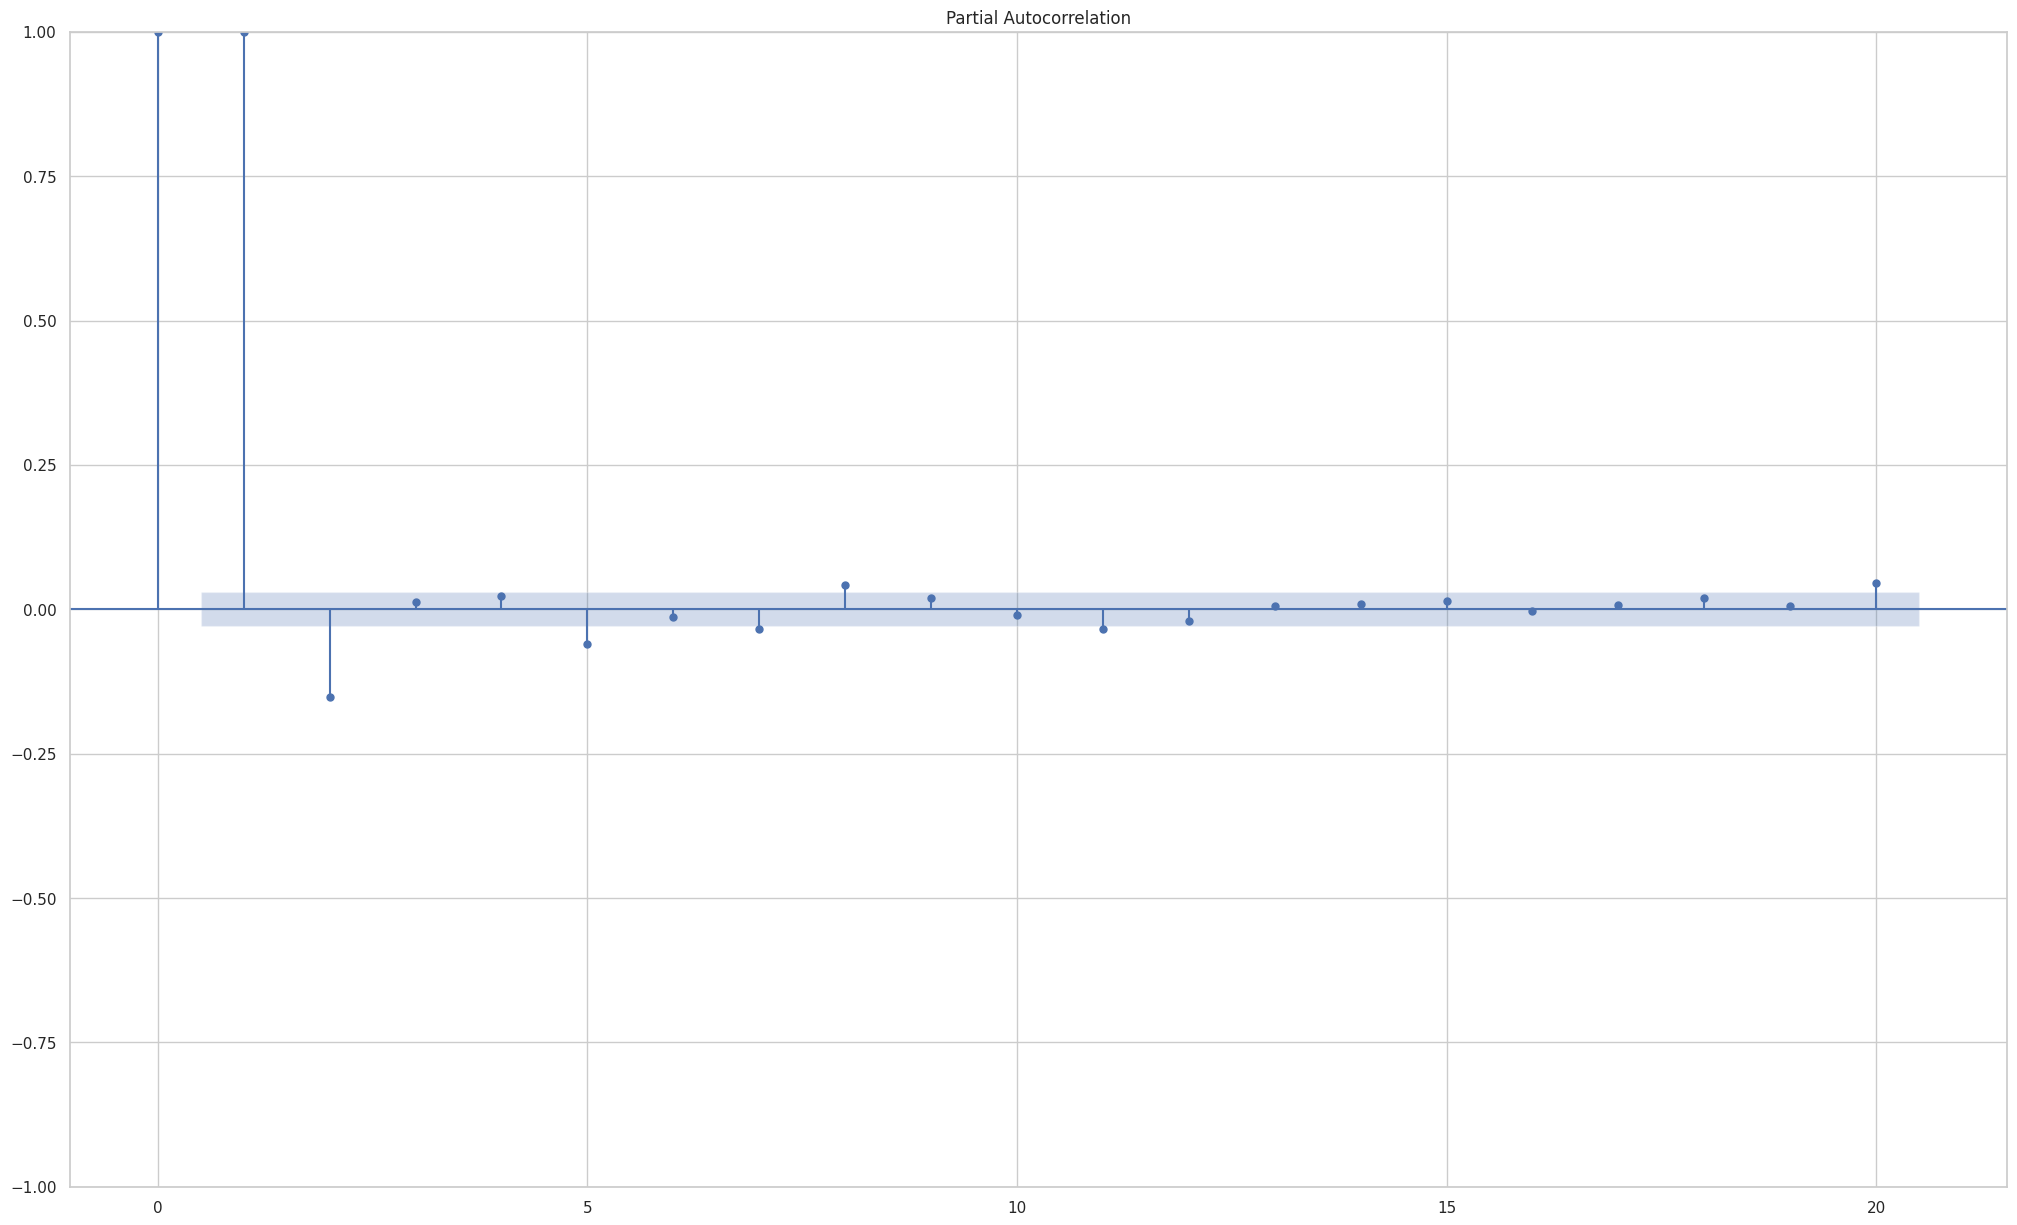

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(train_data_["priceUSD"],lags=20)
plt.show()

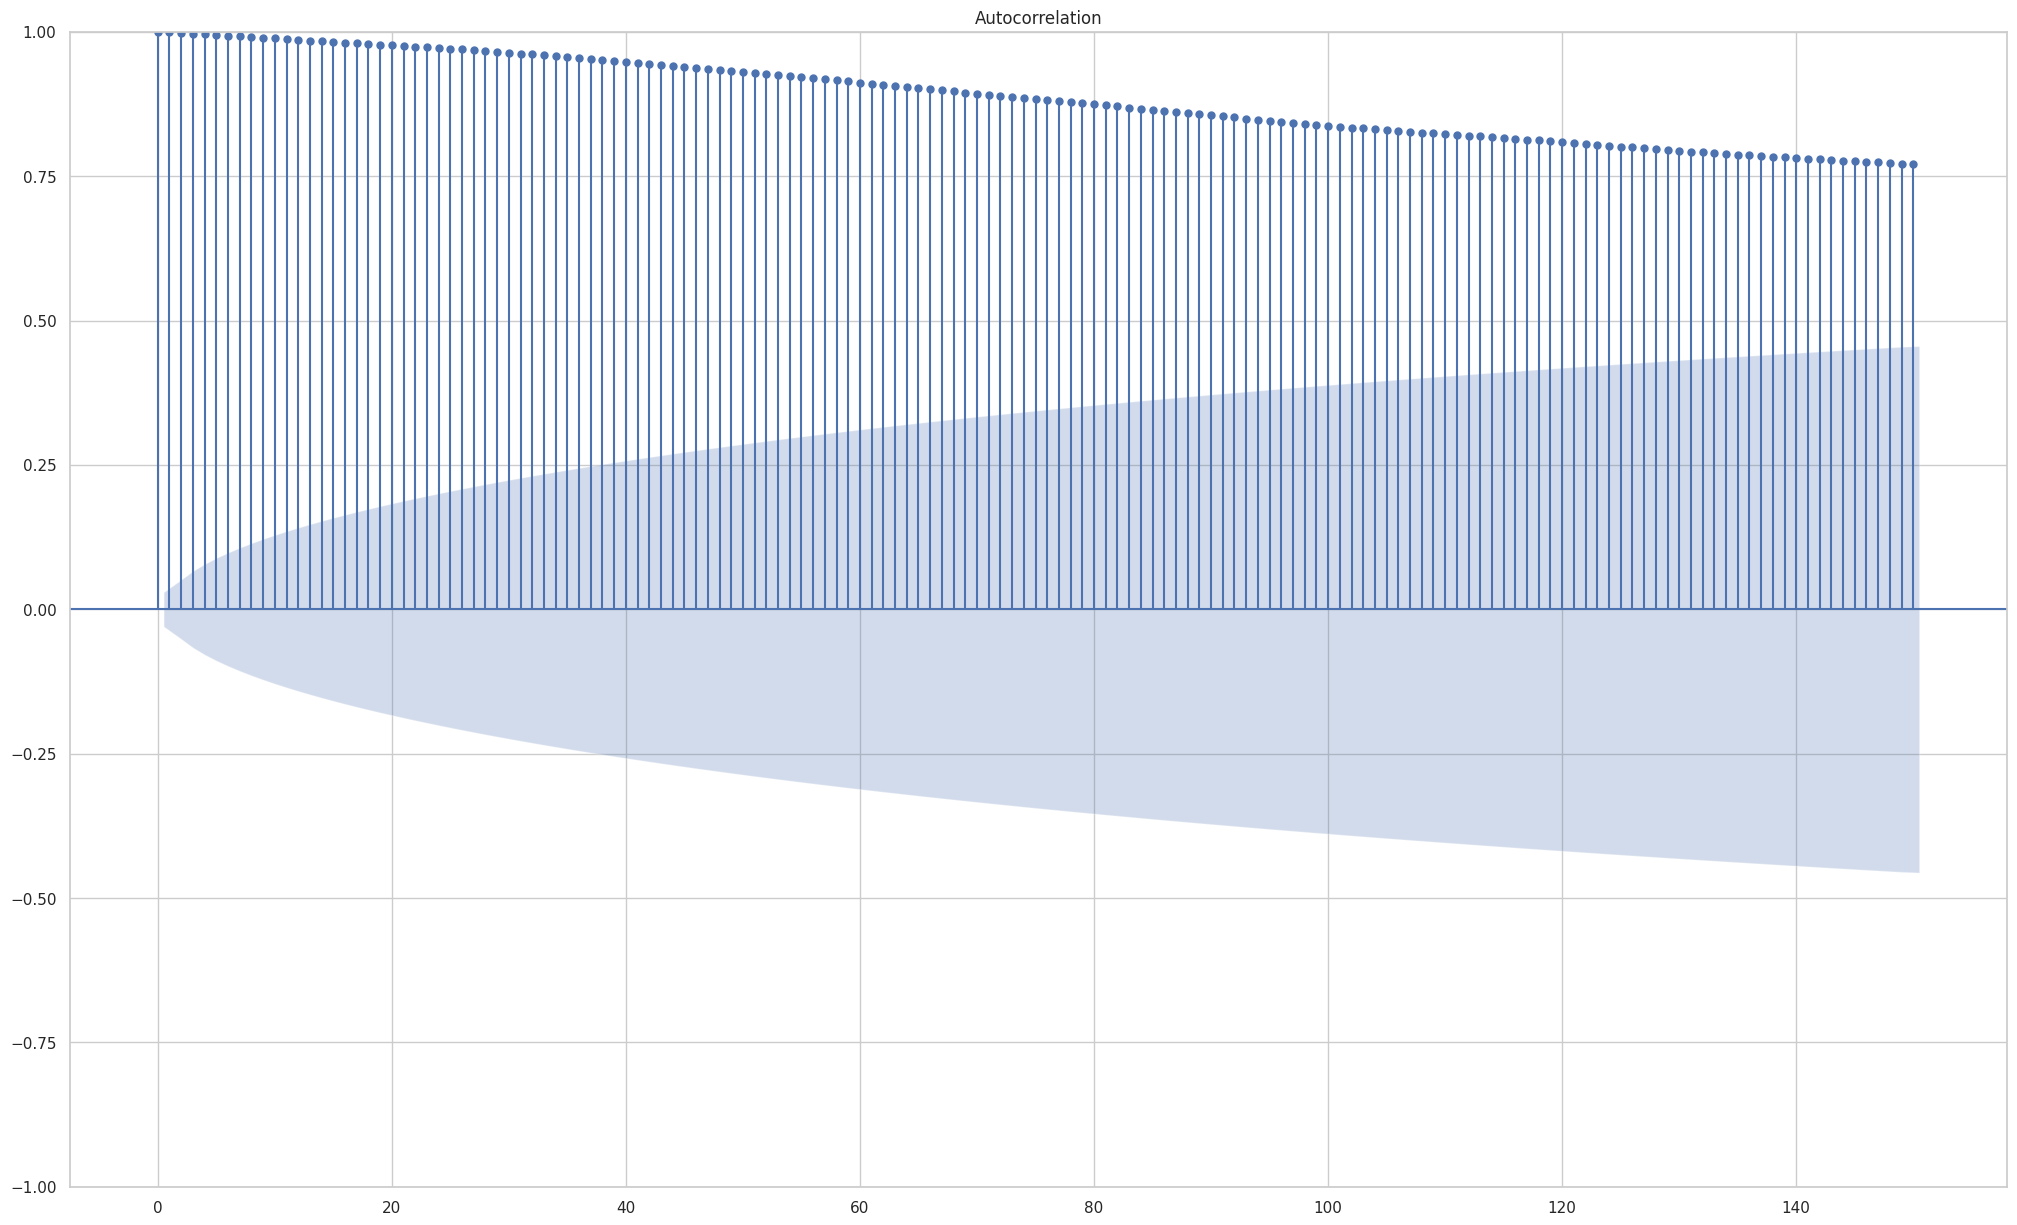

In [54]:
# Plotting autocorrelation of white noise
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_data_["priceUSD"],lags=150,alpha=0.05)
plt.show()

In [55]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(train_data_["priceUSD"], lags=[140], boxpierce=True)

lb_stat  lb_pvalue       bp_stat  bp_pvalue
140  495955.389846        0.0  488362.29106        0.0

### Random Walk

In [56]:
# Augmented Dickey-Fuller test on volume of google and microsoft stocks
#https://www.statsmodels.org/dev/_modules/statsmodels/tsa/stattools.html
from statsmodels.tsa.stattools import adfuller
adf = adfuller(train_data_["priceUSD"])
print("p-value : {}".format(float(adf[1])))

p-value : 0.4455994599833385


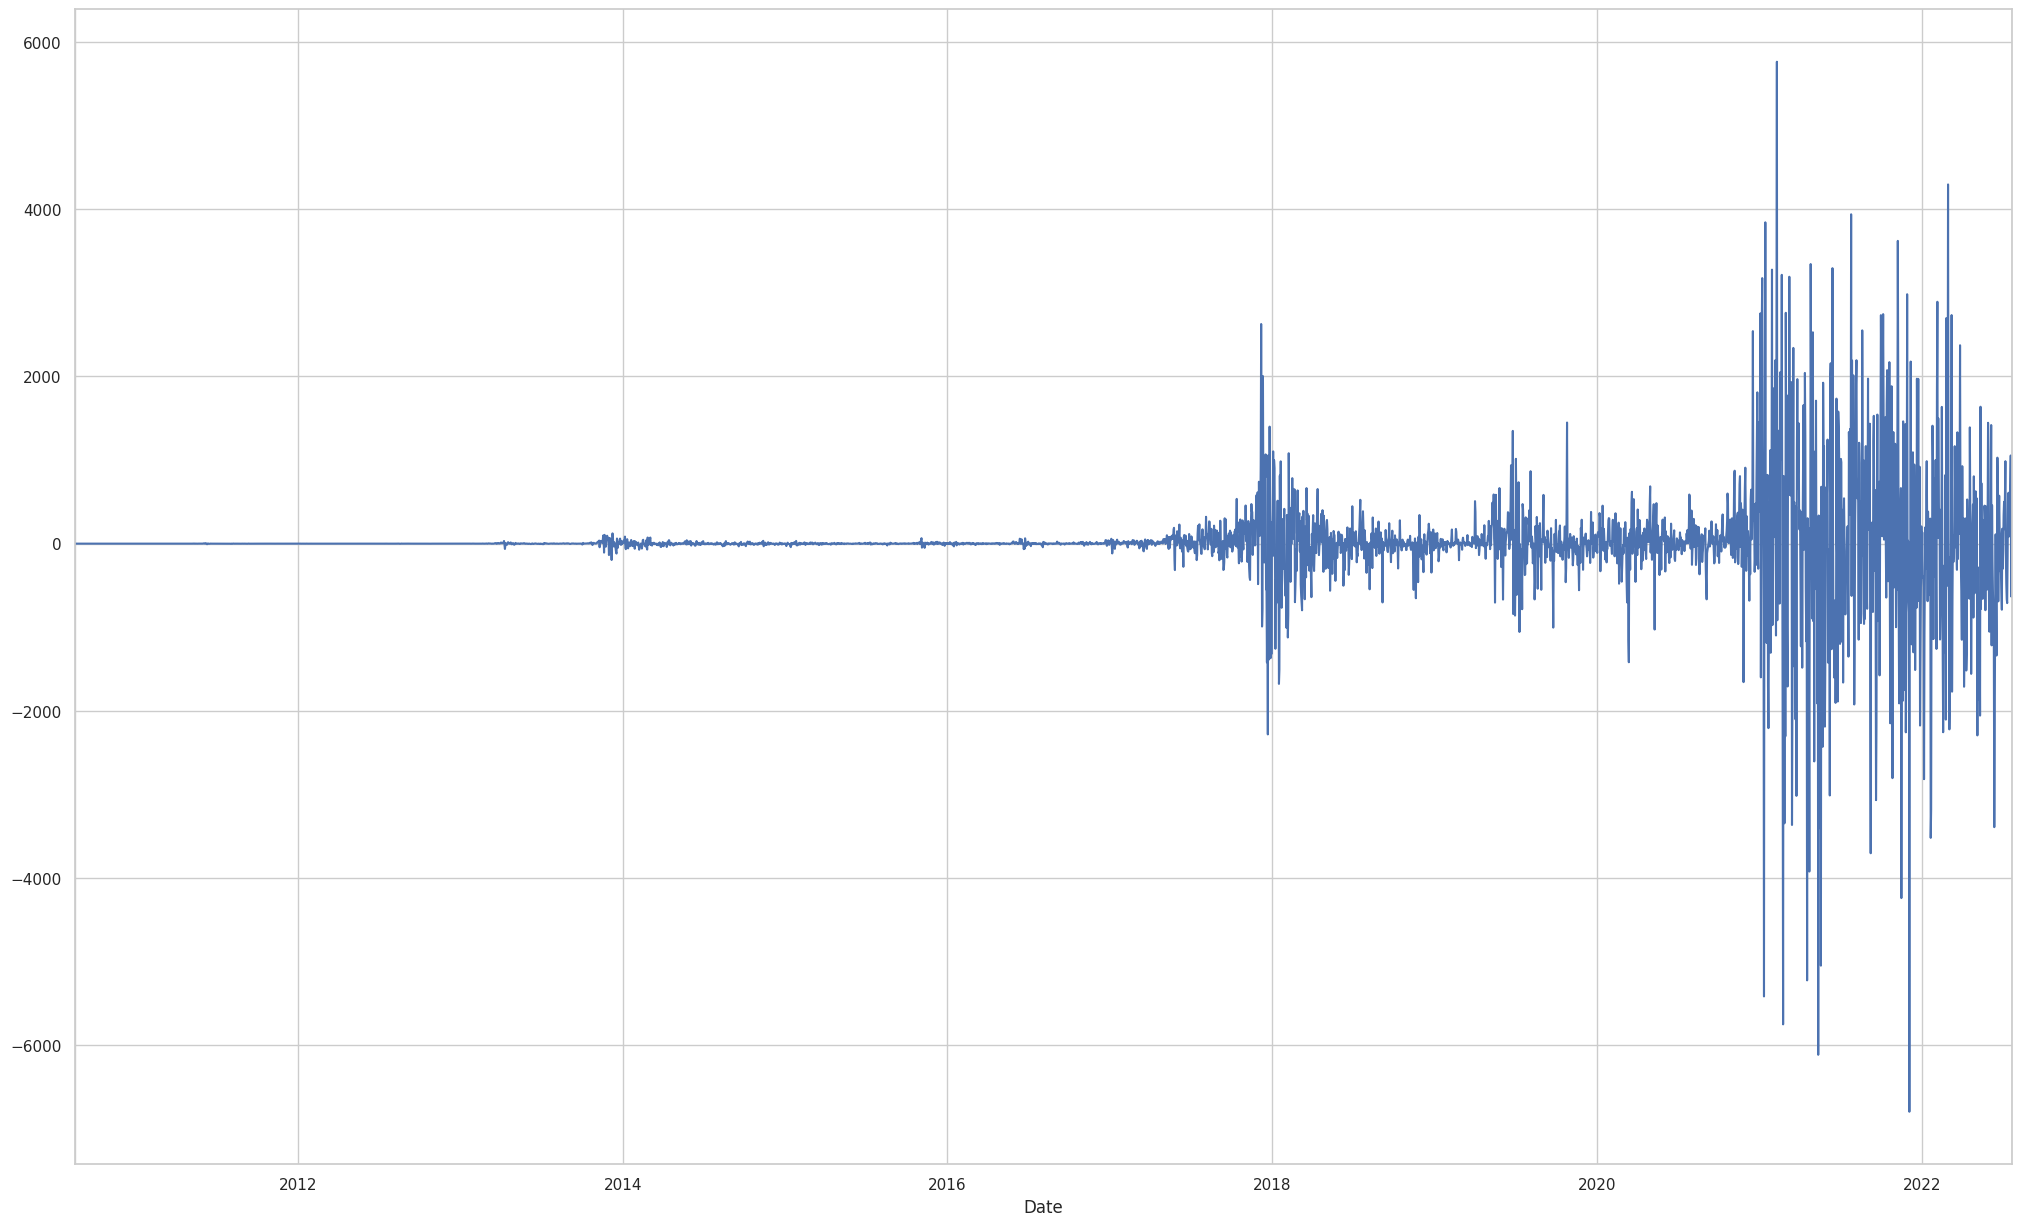

In [57]:
diff_Y_i = train_data_["priceUSD"].diff()
train_data_ = train_data_.assign(difference=pd.Series(diff_Y_i))

#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()
diff_Y_i.plot()
plt.show()

In [58]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(diff_Y_i, lags=[140], boxpierce=True)

lb_stat      lb_pvalue     bp_stat      bp_pvalue
140  905.119555  3.433683e-112  892.645406  6.756353e-110

### Stationary

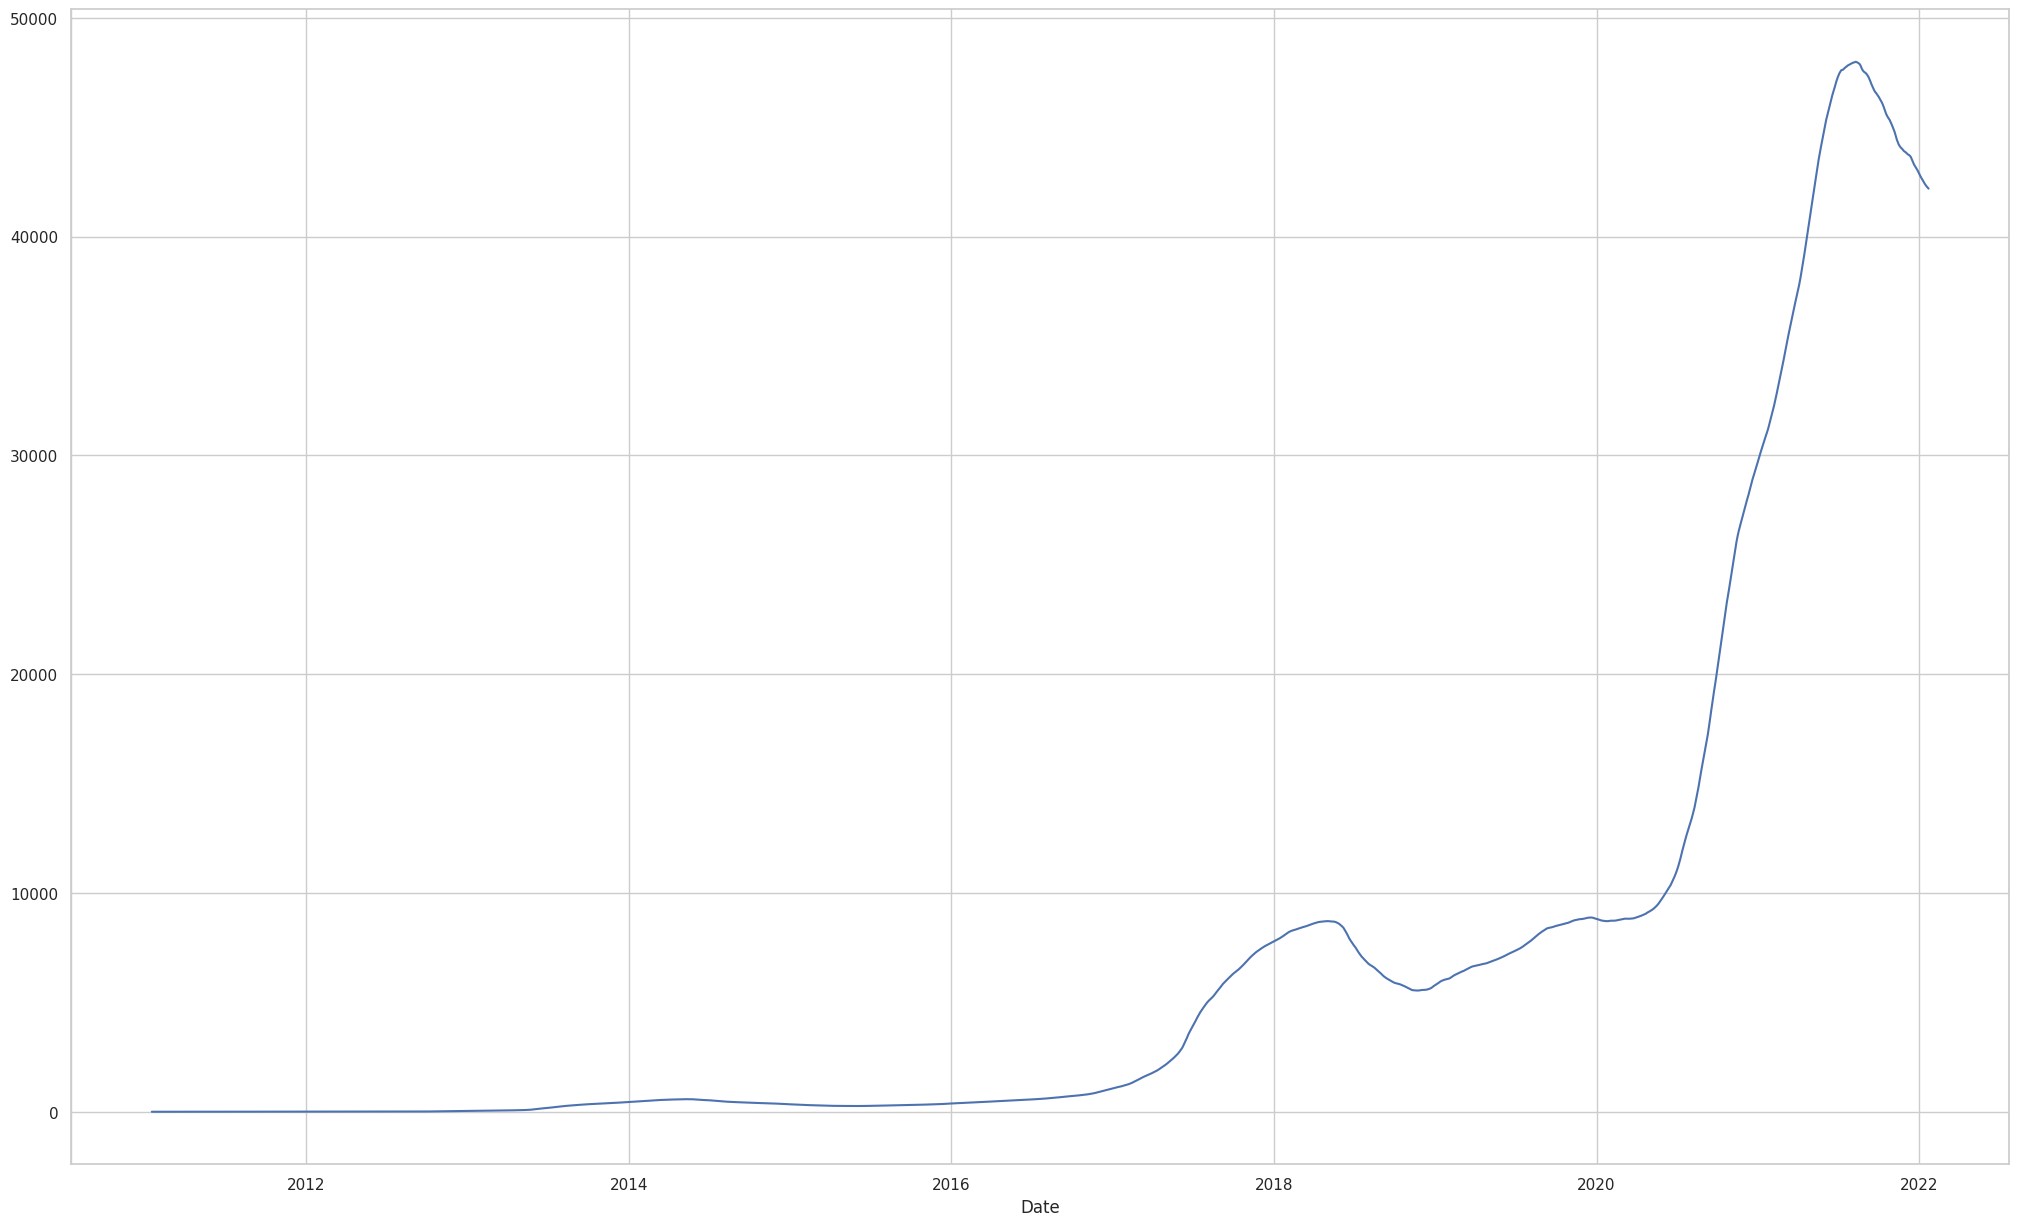

In [59]:
# non stationary
decomposed_train_data_.trend.plot()
plt.show()

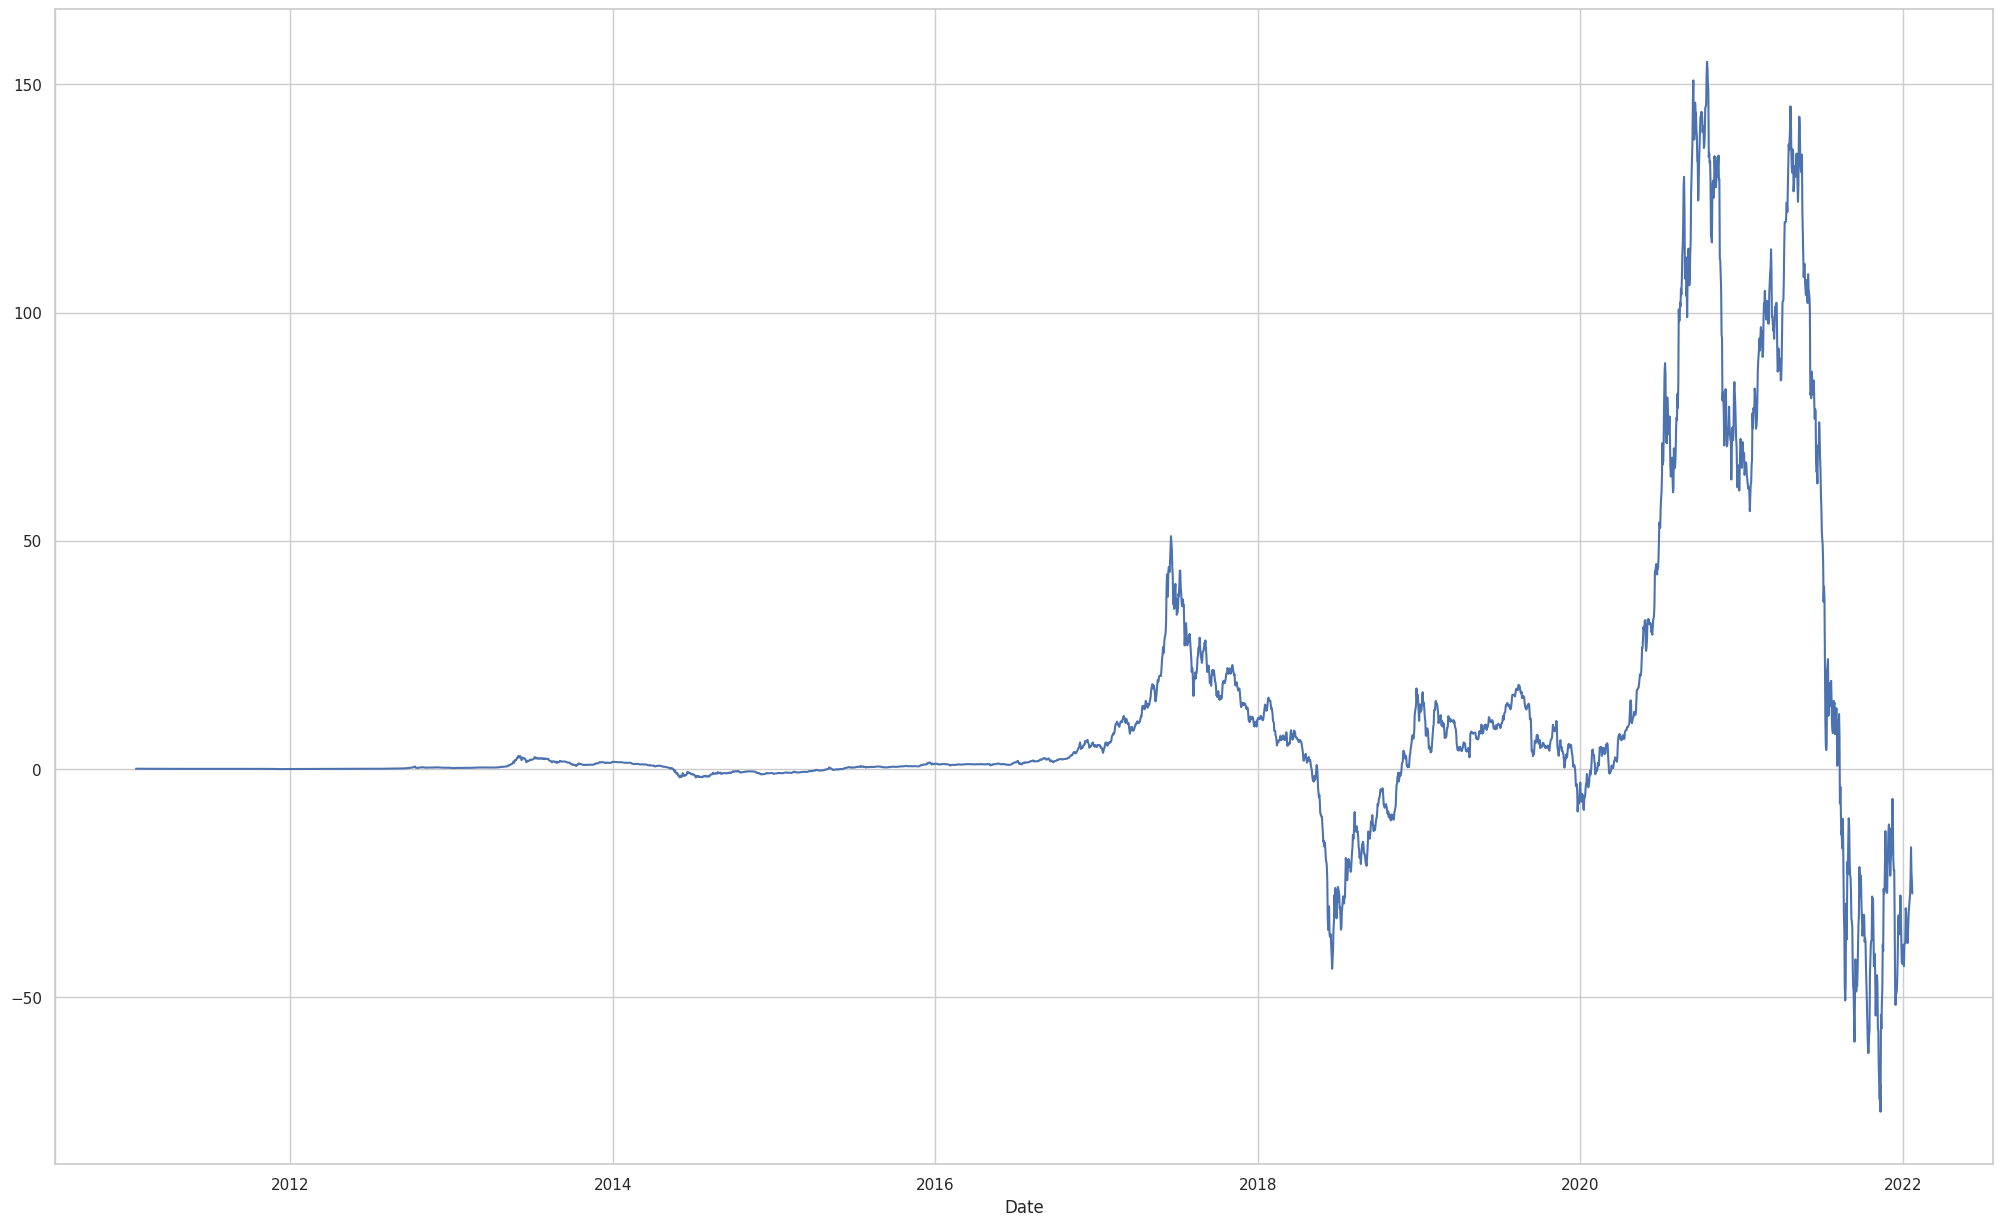

In [60]:
# The new stationary plot
decomposed_train_data_.trend.diff().plot()
plt.show()

In [61]:
train_data_

priceUSD  sentinusd90momUSD  hashrate90mom  difficulty90mom  \
Date                                                                        
2010-08-16      0.0643       0.000000e+00   3.622219e+09     4.989240e+02   
2010-08-17      0.0678       0.000000e+00   3.445072e+09     4.993650e+02   
2010-08-18      0.0690       0.000000e+00   3.219241e+09     4.999270e+02   
2010-08-19      0.0673       0.000000e+00   3.344209e+09     4.999270e+02   
2010-08-20      0.0661       0.000000e+00   4.014649e+09     4.999270e+02   
...                ...                ...            ...              ...   
2022-07-19  22514.0000       3.906392e+09  -1.267260e+19     9.268707e+11   
2022-07-20  23568.0000      -5.213508e+10  -3.853800e+19     9.268707e+11   
2022-07-21  22936.0000      -6.147294e+10  -2.875793e+19     6.012077e+11   
2022-07-22  23145.0000      -3.755837e+09  -2.866946e+19    -5.333602e+11   
2022-07-23  22512.0000      -3.269234e+10  -3.870029e+19    -5.333602e+11   

            activeaddresses7std  difficulty7std  price14momUSD  sentinusdUSD  \
Date                                                                           
2010-08-16              264.432    1.104210e+02          0.003  4.352000e+03   
2010-08-17              282.625    1.397380e+02          0.008  3.387000e+03   
2010-08-18              286.932    1.506710e+02          0.009  2.580000e+03   
2010-08-19              307.297    1.473670e+02          0.008  1.373000e+03   
2010-08-20              247.806    1.287370e+02          0.004  1.955000e+03   
...                         ...             ...            ...           ...   
2022-07-19           194475.000    3.852714e+06       2518.000  5.415818e+10   
2022-07-20           186298.000    3.852714e+06       3399.000  4.309965e+10   
2022-07-21           178152.000    2.279166e+11       2169.000  5.569455e+10   
2022-07-22           169728.000    1.009299e+12       1393.000  5.839661e+10   
2022-07-23           166542.000    1.279570e+12        896.801  4.852391e+10   

            transactionvalue3stdUSD  activeaddresses3std  ...       lag_1  \
Date                                                      ...               
2010-08-16                    6.484              285.294  ...      0.0661   
2010-08-17                    6.340              299.966  ...      0.0643   
2010-08-18                    3.272              243.332  ...      0.0678   
2010-08-19                    5.277              230.879  ...      0.0690   
2010-08-20                    2.304              216.058  ...      0.0673   
...                             ...                  ...  ...         ...   
2022-07-19                96131.000           216592.000  ...  21806.0000   
2022-07-20                47620.000           114188.000  ...  22514.0000   
2022-07-21                66956.000            94111.000  ...  23568.0000   
2022-07-22                67436.000            94359.000  ...  22936.0000   
2022-07-23                39402.000           130208.000  ...  23145.0000   

                 lag_2       lag_3       lag_4       lag_5       lag_6  \
Date                                                                     
2010-08-16      0.0663      0.0655      0.0690      0.0635      0.0690   
2010-08-17      0.0661      0.0663      0.0655      0.0690      0.0635   
2010-08-18      0.0643      0.0661      0.0663      0.0655      0.0690   
2010-08-19      0.0678      0.0643      0.0661      0.0663      0.0655   
2010-08-20      0.0690      0.0678      0.0643      0.0661      0.0663   
...                ...         ...         ...         ...         ...   
2022-07-19  21223.0000  20866.0000  20781.0000  20173.0000  19603.0000   
2022-07-20  21806.0000  21223.0000  20866.0000  20781.0000  20173.0000   
2022-07-21  22514.0000  21806.0000  21223.0000  20866.0000  20781.0000   
2022-07-22  23568.0000  22514.0000  21806.0000  21223.0000  20866.0000   
2022-07-23  22936.0000  23568.0000  22514.0000  21806.0000  21223.0000   

      

In [62]:
train_data_.columns

Index(['priceUSD', 'sentinusd90momUSD', 'hashrate90mom', 'difficulty90mom',
       'activeaddresses7std', 'difficulty7std', 'price14momUSD',
       'sentinusdUSD', 'transactionvalue3stdUSD', 'activeaddresses3std',
       'transactions3std', 'price30momUSD', 'fee_to_reward3stdUSD',
       'mining_profitability90trx', 'sentinusd30momUSD',
       'transactionvalue30momUSD', 'transactions', 'difficulty',
       'difficulty14std', 'difficulty30mom', 'mining_profitability30trx',
       'Change', 'expanding_mean', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'lag_6', 'lag_7', 'Return', 'Mean', 'difference'],
      dtype='object')

# Modelling

## Simulated Model

In [63]:
print(train_data_.isnull().values.sum())
train_data_.dropna(axis = 0, how ='any',inplace=True)
print(train_data_.isnull().values.sum())

1
0


In [64]:
# prepare situation
def moving_average_(data):
    X = data
    window = 3
    history = [X[i] for i in range(window)]
    test = [X[i] for i in range(window, len(X))]
    predictions = list()
    # walk forward over time steps in test
    for t in range(len(test)):
        length = len(history)
        yhat = mean([history[i] for i in range(length-window,length)])
        obs = test[t]
        predictions.append(yhat)
        history.append(obs)
        #print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # zoom plot
    pyplot.plot(test[0:100],label="Original")
    pyplot.plot(predictions[0:100], color='red',label="Prediction")
    plt.legend()
    pyplot.show()

Test MSE: 559300.239


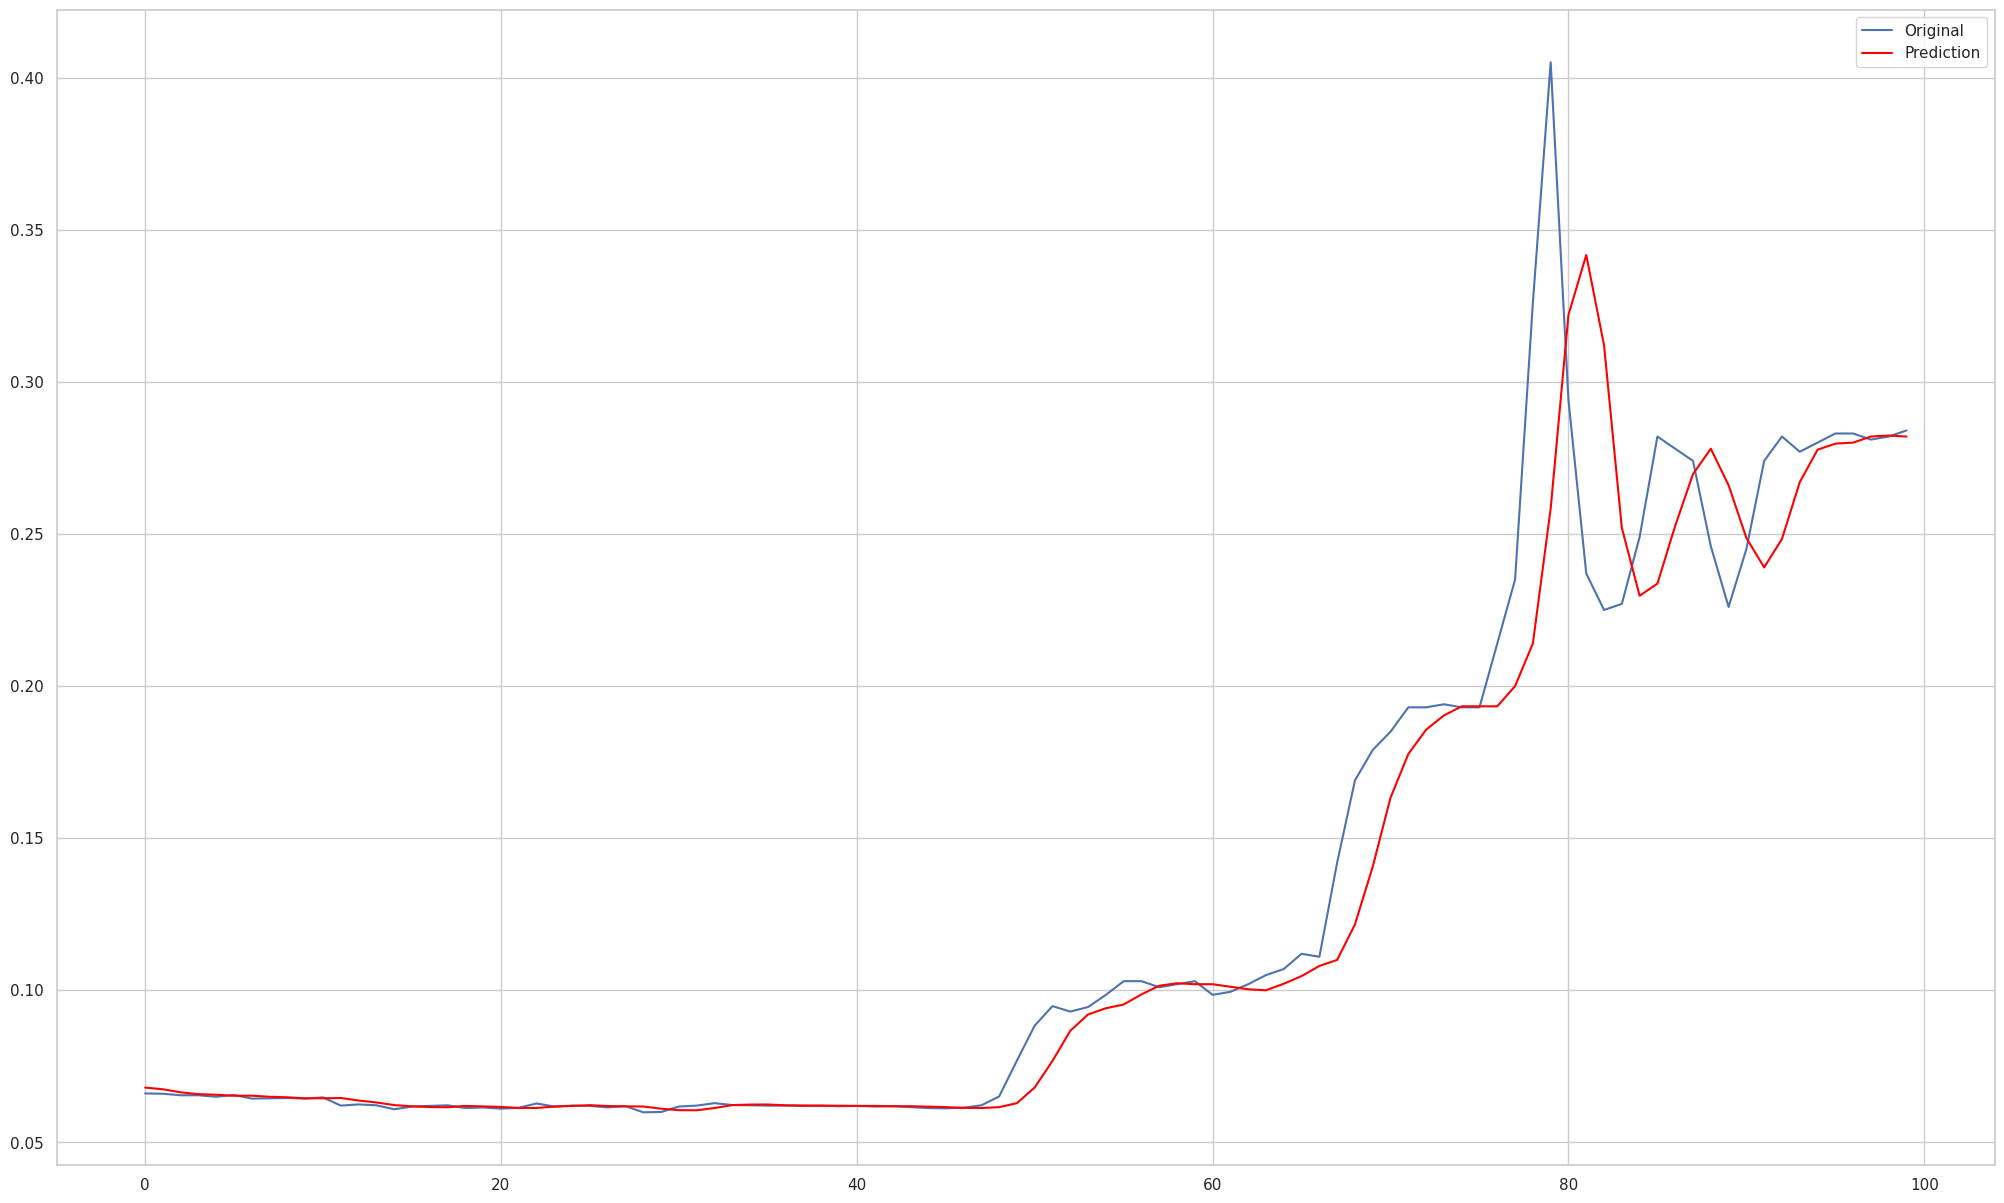

In [65]:
moving_average_(train_data_["priceUSD"].values)

In [66]:
df_train = train_data_[train_data_.index < "2019"]
df_valid = train_data_[train_data_.index >= "2019"]

In [67]:
def exponential_moving_():
    weights = np.arange(1,31) #this creates an array with integers 1 to 31 included
    weights
    wma10 = train_data_["priceUSD"].rolling(30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
    train_data_['30day_WMA'] = np.round(wma10, decimals=3)
    #sma10 = train_data_['priceUSD'].rolling(30).mean()
    temp = train_data_.dropna(how='any',axis=0)
    print(sqrt(mean_squared_error(temp.priceUSD, temp['30day_WMA'])))
    plt.figure(figsize = (12,6))
    plt.plot(train_data_['priceUSD'], label="Price")
    plt.plot(wma10, label="30-Day WMA")
    #plt.plot(sma10, label="10-Day SMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

1574.291085255173


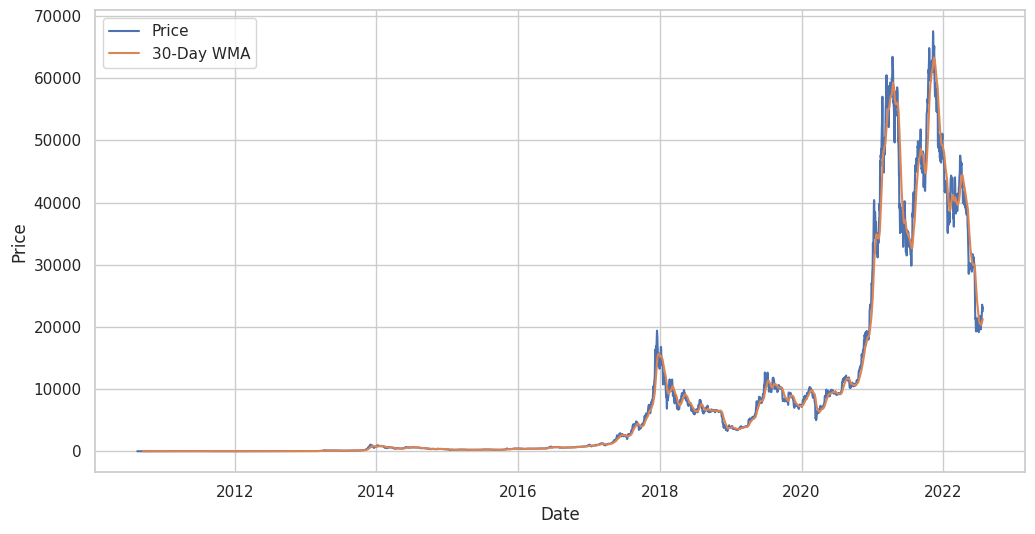

In [68]:
exponential_moving_()

## Exponential Moving Average

In [69]:
def exponential_moving_average():
    ema30 = train_data_['priceUSD'].ewm(span=30).mean()
    train_data_['30_day_EMA'] = np.round(ema30, decimals=3)
    print(sqrt(mean_squared_error(train_data_.priceUSD, train_data_['30_day_EMA'])))
    plt.figure(figsize = (12,6))
    plt.plot(train_data_['priceUSD'], label="Price")
    plt.plot(ema30, label="30-Day WMA")
    #plt.plot(sma10, label="10-Day SMA")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

1815.1562463416376


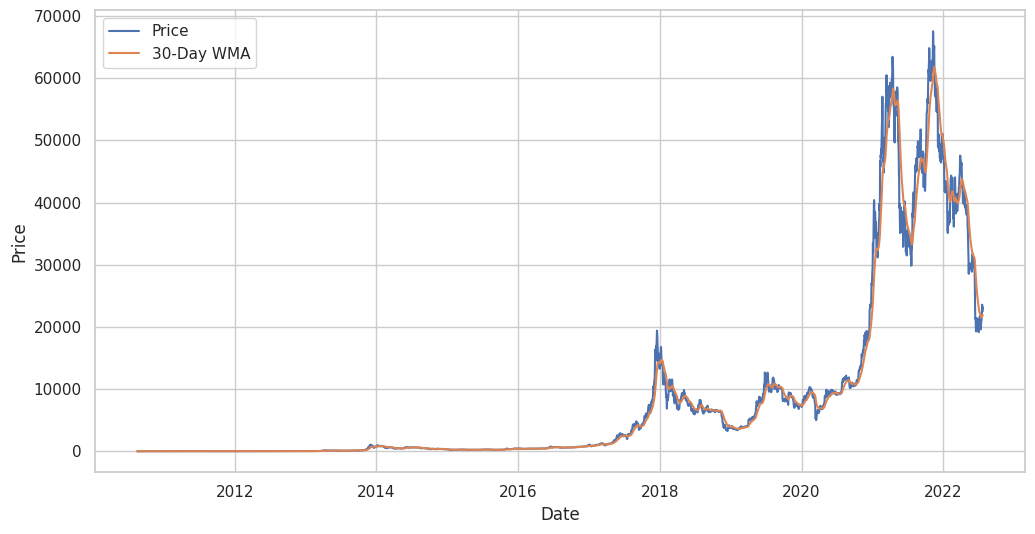

In [70]:
exponential_moving_average()

Test MSE: 559300.239


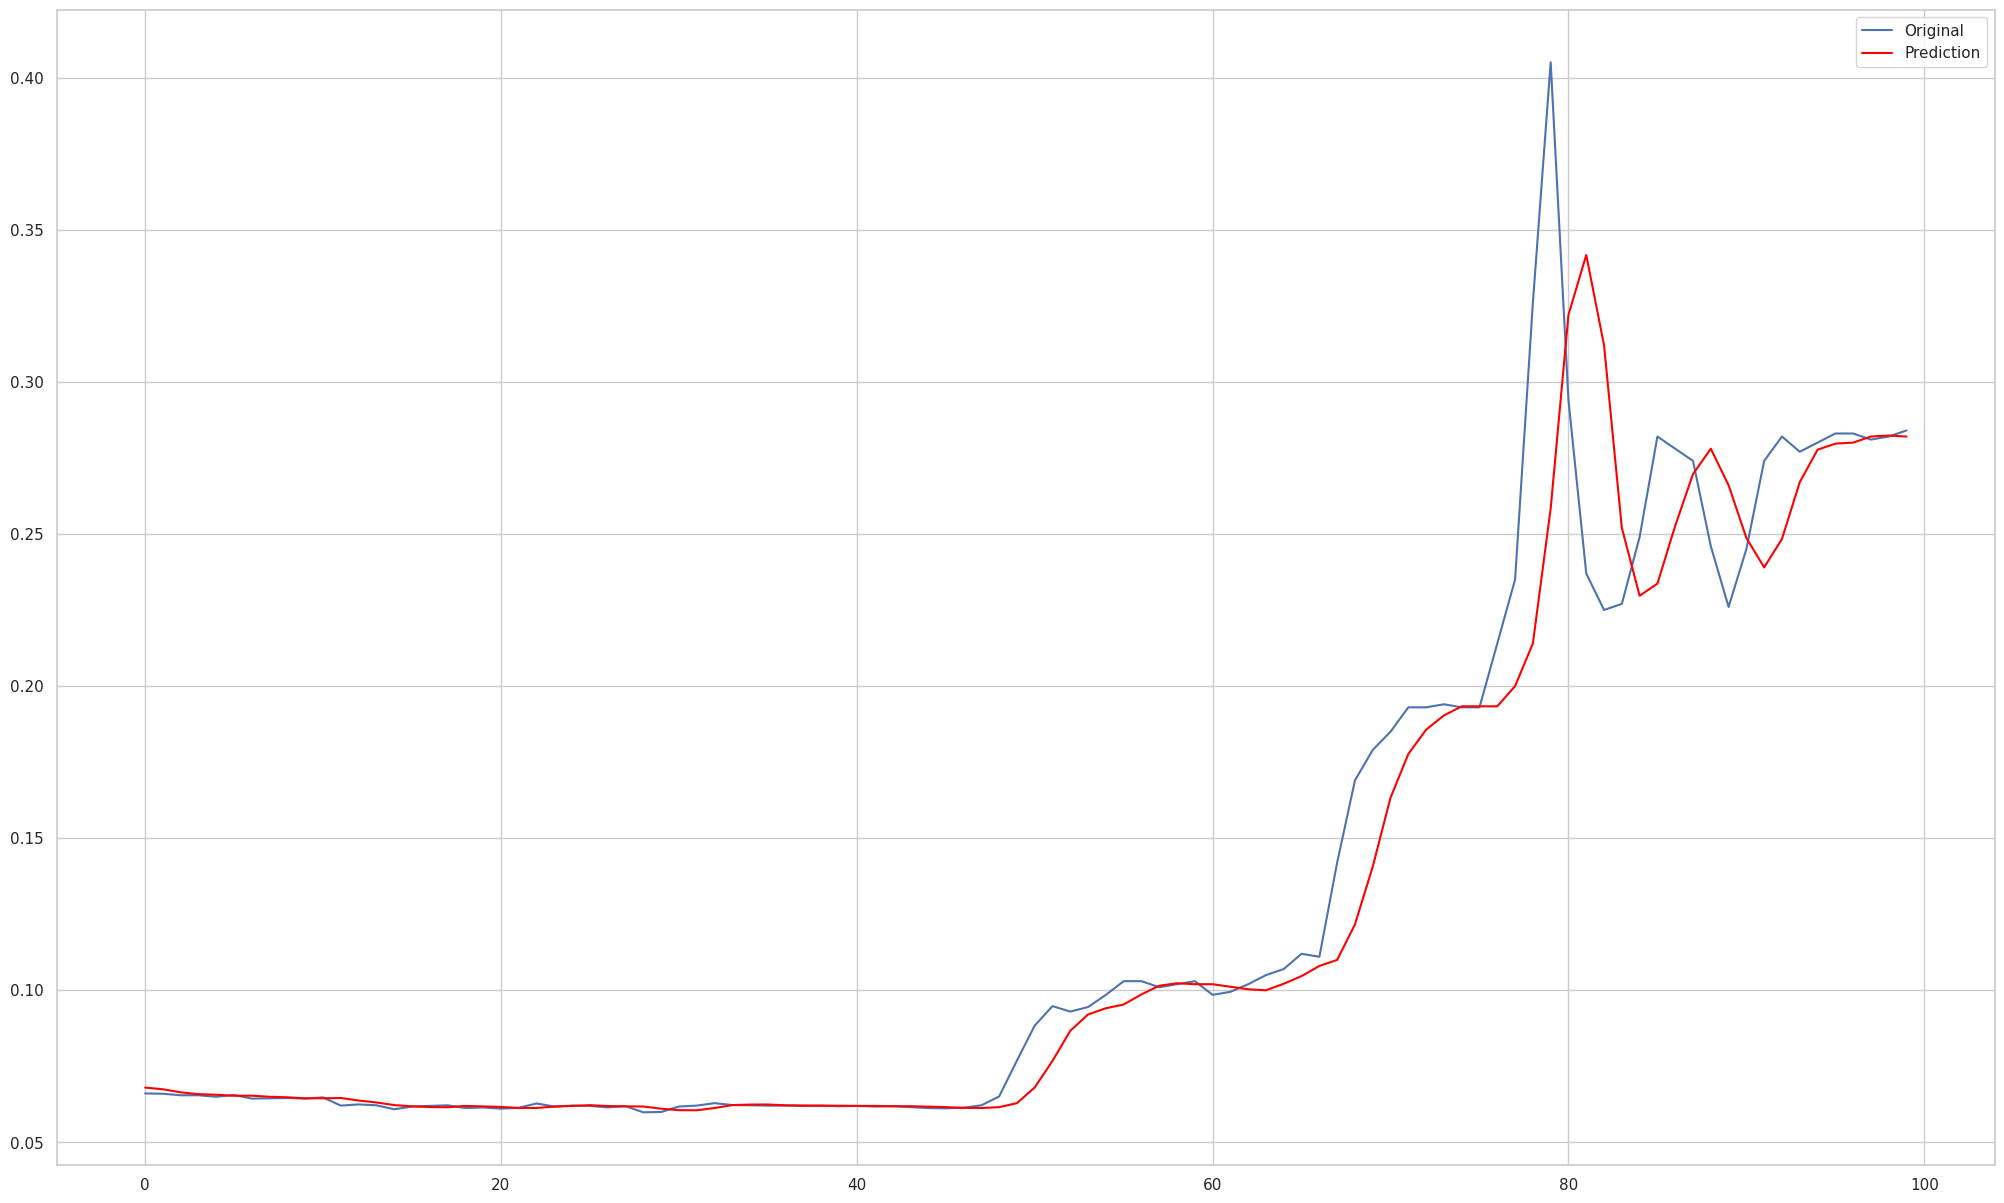

In [71]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# prepare situation
X = train_data_["priceUSD"].values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# zoom plot
pyplot.plot(test[0:100],label="Original")
pyplot.plot(predictions[0:100], color='red',label="Prediction")
plt.legend()
pyplot.show()

#Train & Test Set

In [72]:
train_data_.columns

Index(['priceUSD', 'sentinusd90momUSD', 'hashrate90mom', 'difficulty90mom',
       'activeaddresses7std', 'difficulty7std', 'price14momUSD',
       'sentinusdUSD', 'transactionvalue3stdUSD', 'activeaddresses3std',
       'transactions3std', 'price30momUSD', 'fee_to_reward3stdUSD',
       'mining_profitability90trx', 'sentinusd30momUSD',
       'transactionvalue30momUSD', 'transactions', 'difficulty',
       'difficulty14std', 'difficulty30mom', 'mining_profitability30trx',
       'Change', 'expanding_mean', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5',
       'lag_6', 'lag_7', 'Return', 'Mean', 'difference', '30day_WMA',
       '30_day_EMA'],
      dtype='object')

In [73]:
X = train_data_.dropna().drop("priceUSD", axis=1).drop("30day_WMA", axis=1).drop("30_day_EMA", axis=1).astype(np.float32)
y = train_data_.dropna()[["priceUSD"]].astype(np.float32)
X.head()

sentinusd90momUSD  hashrate90mom  difficulty90mom  \
Date                                                            
2010-09-15                0.0   6.328589e+09       695.502991   
2010-09-16                0.0   6.752614e+09       695.502991   
2010-09-17                0.0   7.633281e+09       695.502991   
2010-09-18                0.0   7.784100e+09       695.502991   
2010-09-19                0.0   9.786195e+09       875.934021   

            activeaddresses7std  difficulty7std  price14momUSD  sentinusdUSD  \
Date                                                                           
2010-09-15           203.802002        0.000000         -0.001        2453.0   
2010-09-16           194.550995        0.000000          0.000        2141.0   
2010-09-17           308.384003        0.000000         -0.001        4514.0   
2010-09-18           253.757996        0.000000         -0.002        2617.0   
2010-09-19           257.381012      126.275002          0.000        3160.0   

            transactionvalue3stdUSD  activeaddresses3std  transactions3std  \
Date                                                                         
2010-09-15                   11.004            51.880001         39.731998   
2010-09-16                    1.054            20.806000         38.689999   
2010-09-17                    6.828           311.222992         88.903999   
2010-09-18                    6.536           371.622986         58.446999   
2010-09-19                    4.889           379.910004         13.098000   

            ...   lag_1   lag_2   lag_3   lag_4   lag_5   lag_6   lag_7  \
Date        ...                                                           
2010-09-15  ...  0.0620  0.0621  0.0618  0.0628  0.0614  0.0611  0.0615   
2010-09-16  ...  0.0615  0.0620  0.0621  0.0618  0.0628  0.0614  0.0611   
2010-09-17  ...  0.0619  0.0615  0.0620  0.0621  0.0618  0.0628  0.0614   
2010-09-18  ...  0.0599  0.0619  0.0615  0.0620  0.0621  0.0618  0.0628   
2010-09-19  ...  0.0600  0.0599  0.0619  0.0615  0.0620  0.0621  0.0618   

              Return      Mean  difference  
Date                                        
2010-09-15 -0.806452  0.063657     -0.0005  
2010-09-16  0.650406  0.063460      0.0004  
2010-09-17 -3.231018  0.063157     -0.0020  
2010-09-18  0.166945  0.062913      0.0001  
2010-09-19  3.000000  0.062770      0.0018  

[5 rows x 32 columns]

In [74]:
X = train_data_[["lag_1", "lag_2", "lag_3", "lag_4", "lag_5", "lag_6", "lag_7"]].dropna().astype(np.float32)
y = train_data_[["priceUSD"]].dropna().astype(np.float32)
X, y

(                 lag_1       lag_2       lag_3       lag_4       lag_5  \
 Date                                                                     
 2010-08-17      0.0643      0.0661      0.0663      0.0655      0.0690   
 2010-08-18      0.0678      0.0643      0.0661      0.0663      0.0655   
 2010-08-19      0.0690      0.0678      0.0643      0.0661      0.0663   
 2010-08-20      0.0673      0.0690      0.0678      0.0643      0.0661   
 2010-08-21      0.0661      0.0673      0.0690      0.0678      0.0643   
 ...                ...         ...         ...         ...         ...   
 2022-07-19  21806.0000  21223.0000  20866.0000  20781.0000  20173.0000   
 2022-07-20  22514.0000  21806.0000  21223.0000  20866.0000  20781.0000   
 2022-07-21  23568.0000  22514.0000  21806.0000  21223.0000  20866.0000   
 2022-07-22  22936.0000  23568.0000  22514.0000  21806.0000  21223.0000   
 2022-07-23  23145.0000  22936.0000  23568.0000  22514.0000  21806.0000   
 
                  lag_6

In [75]:
X.columns, y.columns

(Index(['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7'], dtype='object'),
 Index(['priceUSD'], dtype='object'))

In [76]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(X)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = X[:split_size], y[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(3487, 872, 3487, 872)

In [77]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [78]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(X, y)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(3487, 872, 3487, 872)

# Dense Model

In [79]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [80]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [81]:
tf.random.set_seed(42)

# Make multivariate time series model
model = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(1)
], name="model_dense_multivariate")

# Compile
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model.fit(train_windows, train_labels,
          epochs=100,
          batch_size=128,
          verbose=0, # only print 1 line per epoch
          validation_data=(test_windows, test_labels))

In [82]:
model.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 2ms/step - loss: 761.0477


761.0477294921875

In [83]:
# Make predictions on multivariate data
model_preds = tf.squeeze(model.predict(test_windows))
model_preds[:10]

28/28 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8757.505 , 8718.191 , 9016.48  , 9080.206 , 9000.947 , 8460.816 ,
       7716.3745, 7932.9077, 7839.353 , 6619.195 ], dtype=float32)>

In [84]:
# Evaluate preds
model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_preds)
model_results

{'mae': 761.0477,
 'mse': 1354798.1,
 'rmse': 1163.958,
 'mape': 2.3287055,
 'mase': 1.018117}

In [85]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

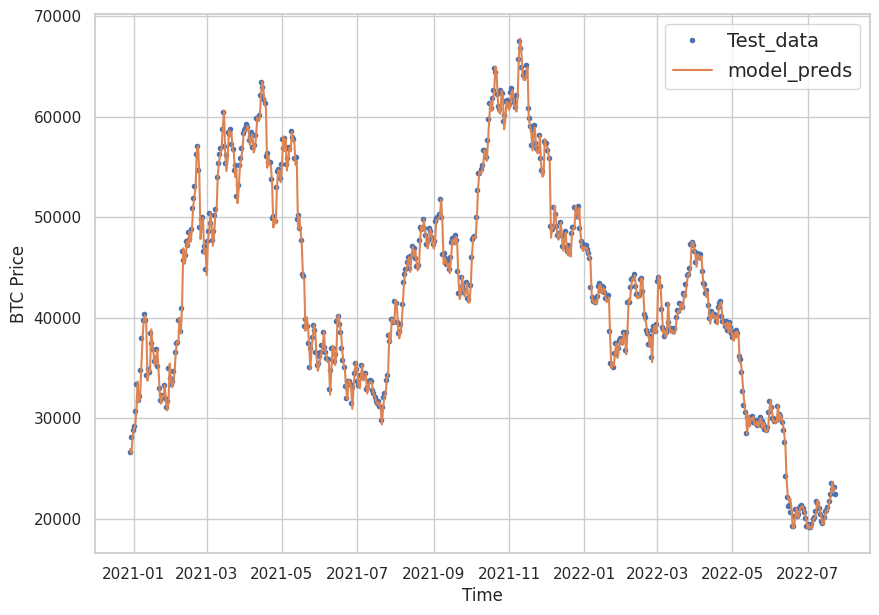

In [86]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test.index.to_numpy(), values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=X_test.index.to_numpy(), values=model_preds, start=offset, format="-", label="model_preds")

# LSTM Model

In [98]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(7))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
output = layers.Dense(1)(x)
model_lstm = tf.keras.Model(inputs=inputs, outputs=output, name="model_lstm")

# Compile model
model_lstm.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_lstm.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            )

In [99]:
model_lstm.evaluate(test_windows, test_labels)

28/28 [==============================] - 0s 4ms/step - loss: 760.7241


760.72412109375

In [117]:
# Make predictions on multivariate data
model_preds_lstm = tf.squeeze(model_lstm.predict(test_windows))
model_preds_lstm[:10]

28/28 [==============================] - 0s 5ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8807.202 , 8768.515 , 9027.325 , 9111.8125, 9068.971 , 8606.157 ,
       7865.1196, 7904.327 , 7880.5303, 6814.769 ], dtype=float32)>

In [101]:
# Evaluate preds
model_results_lstm = evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_preds_lstm)
model_results_lstm

{'mae': 760.72406,
 'mse': 1409711.9,
 'rmse': 1187.3129,
 'mape': 2.3159728,
 'mase': 1.017684}

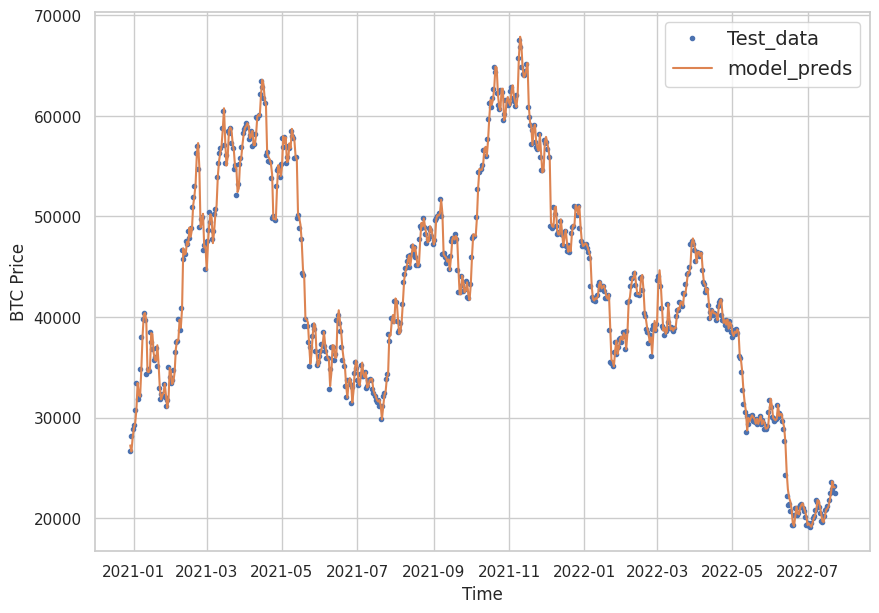

In [102]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test.index.to_numpy(), values=test_labels, start=offset, label="Test_data")
plot_time_series(timesteps=X_test.index.to_numpy(), values=model_preds_lstm, start=offset, format="-", label="model_preds")

# Future Forecasts

In [104]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=7) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-window_size:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time
  for _ in range(into_future):

    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-window_size:]

  return future_forecast

In [ ]:
# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

In [121]:
future_forecast = make_future_forecast(values=X,
                                       model=model_lstm,
                                       into_future=5,
                                       window_size=7)

TypeError: ignored

In [123]:
tf.keras.models.save_model(
    model_lstm,
    "/content/BTC_LSTM_Model.h5",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

<ipython-input-123-3a63f326085b>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(


# Future Work (NBeats)

In [87]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>)

In [88]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [89]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = 7 * 1 # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + 1

In [90]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=7,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(32), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=7,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            )

ValueError: ignored

In [227]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(model, data):
  ensemble_preds = []
  preds = model.predict(data) # make predictions with current ensemble model
  ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [228]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(model,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 147ms/step


<tf.Tensor: shape=(866,), dtype=float32, numpy=
array([4.00427704e+16, 2.18098783e+16, 2.28942716e+16, 1.56001373e+16,
       3.52125643e+16, 6.98123312e+15, 3.77825696e+15, 9.98158990e+15,
       2.56086029e+15, 1.72683627e+16, 4.00637298e+16, 2.16471506e+16,
       5.28483700e+15, 1.23982134e+16, 2.40949555e+16, 5.84416737e+15,
       1.13879533e+16, 2.21703807e+16, 3.00432962e+15, 8.97855827e+15,
       6.41697749e+15, 4.52095774e+15, 1.16326870e+16, 2.71142789e+15,
       1.38036083e+16, 3.28817370e+16, 1.42125106e+16, 5.14990845e+15,
       1.54888224e+16, 1.40269165e+16, 2.53239969e+15, 1.31421017e+16,
       1.04396224e+16, 1.66762327e+16, 2.81455907e+16, 2.17808014e+16,
       1.59991999e+16, 1.01269144e+16, 2.31371069e+15, 4.79029728e+15,
       1.91415525e+15, 4.86361452e+15, 1.62245482e+16, 2.77715592e+15,
       2.07419089e+16, 2.14540703e+15, 1.51584879e+16, 1.19680037e+16,
       1.23478076e+16, 4.08397059e+15, 8.95387509e+15, 1.24755099e+16,
       1.47489993e+16, 1.9469